## **Submission Terakhir: Menyelesaikan Permasalahan Institusi Pendidikan**

* **Nama:** B. Hilda Nida Alistiqlal
* **Email:** [hildanida01@gmail.com](mailto:hildanida01@gmail.com)
* **Dicoding ID:** [hildanida](https://dicoding.com/users/hildanida)

### `Memuat Library`

In [1]:
# Memuat dataset
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# Praproses dataset untuk machine learning
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Ketidakseimbangan dataset untuk keperluan machine learning
from imblearn.over_sampling import SMOTE, SMOTEN
from imblearn.combine import SMOTEENN

# Pembangunan model klasifikasi machine learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluasi model machine learning
from sklearn.metrics import make_scorer, fbeta_score, confusion_matrix, classification_report
import shap

# Menyimpan model
import pickle

# Menghilangkan warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", module="joblib.externals.loky")

In [2]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = '4'
os.environ['LOKY_NUM_WORKERS'] = '1'
os.environ['JOBLIB_MULTIPROCESSING'] = '0'

### `Memuat Dataset`

<div style='text-align: left'>Memuat dataset dan menampilkan gambaran awal data untuk memahami struktur serta jumlah baris dan kolom yang tersedia.</div>

In [3]:
# Memuat dataset
df = pd.read_csv('students_performance.csv', delimiter=';')

# Menampilkan dataset 5 baris pertama dan 5 baris terakhir
print("Dataset Head dan Tail: ")
display(pd.concat([df.head(), df.tail()]))

# Mengetahui baris dan kolom
print("Shape Dataset:", df.shape)

Dataset Head dan Tail: 


Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                            122.0            1                     19   
1                            160.0            1                      1   
2                            122.0            1                     37   
3                            122.0            1                     38   
4                            100.0            1                     37   
4419                         125.0            1                      1   
4420                         120.0          105                      1   
4421                         154.0            1                     37   
4422                         180.0            1                     37   
4423                         152.0           22                     38   

      Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                        12  ...                                  0   
1                         3  ...                                  0   
2                        37  ...                                  0   
3                        37  ...                                  0   
4                        38  ...                                  0   
4419                      1  ...                                  0   
4420                      1  ...                                  0   
4421                     37  ...                                  0   
4422                     37  ...                                  0   
4423                     37  ...                                  0   

      Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                     0                                     0   
1                                     6                                     6   
2                                     6                                     0   
3                                     6                                    10   
4                                     6                                     6   
4419                                  6                                     8   
4420                                  6                                     6   
4421                                  8                                     9   
4422                                  5                                     6   
4423                                  6                                     6   

      Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                    

Shape Dataset: (4424, 37)


### `Informasi Dataset`

<div style='text-align: left'>Menampilkan informasi struktur dataset termasuk jumlah nilai unik, jumlah missing value, tipe data tiap kolom, dan penggunaan function untuk membantu proses pra-pemrosesan data.</div>

In [4]:
# Mengetahui info dari dataset
print("Data Information: ")
print(df.info())

Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                       

**Berikut penjelasan lebih rinci terkait masing-masing kolom:**


| Nama Kolom                                | Deskripsi                                                                 |
|-------------------------------------------|---------------------------------------------------------------------------|
| `Marital status`                          | Status pernikahan mahasiswa pada saat pendaftaran.                        |
| `Application mode`                        | Jalur atau mekanisme pendaftaran yang digunakan oleh mahasiswa.           |
| `Application order`                       | Urutan pilihan program studi saat mahasiswa mendaftar.                    |
| `Course`                                  | Program studi yang diambil oleh mahasiswa.                                |
| `Daytime/evening attendance`              | Waktu kehadiran mahasiswa: pagi atau malam hari.                          |
| `Previous qualification`                  | Pendidikan terakhir yang dimiliki mahasiswa sebelum masuk kuliah.         |
| `Previous qualification (grade)`          | Nilai akhir dari kualifikasi sebelumnya yang diperoleh mahasiswa.         |
| `Nacionality`                             | Kewarganegaraan mahasiswa.                                                |
| `Mother's qualification`                  | Tingkat pendidikan terakhir yang dimiliki ibu mahasiswa.                  |
| `Father's qualification`                  | Tingkat pendidikan terakhir yang dimiliki ayah mahasiswa.                 |
| `Mother's occupation`                     | Jenis pekerjaan yang dilakukan oleh ibu mahasiswa.                        |
| `Father's occupation`                     | Jenis pekerjaan yang dilakukan oleh ayah mahasiswa.                       |
| `Admission grade`                         | Nilai ujian masuk perguruan tinggi yang diperoleh mahasiswa.              |
| `Displaced`                               | Apakah mahasiswa tinggal jauh dari domisili asal.                         |
| `Educational special needs`               | Menyatakan apakah mahasiswa memiliki kebutuhan pendidikan khusus.         |
| `Debtor`                                  | Menunjukkan apakah mahasiswa memiliki tunggakan pembayaran.               |
| `Tuition fees up to date`                 | Menunjukkan apakah pembayaran biaya kuliah mahasiswa sudah terbayar.      |
| `Gender`                                  | Jenis kelamin mahasiswa.                                                  |
| `Scholarship holder`                      | Status kepemilikan beasiswa oleh mahasiswa.                               |
| `Age at enrollment`                       | Usia mahasiswa saat pertama kali mendaftar kuliah.                        |
| `International`                           | Menunjukkan apakah mahasiswa adalah mahasiswa internasional.              |
| `Curricular units 1st sem (credited)`     | Jumlah mata kuliah semester 1 yang diakui (transfer kredit).              |
| `Curricular units 1st sem (enrolled)`     | Jumlah mata kuliah semester 1 yang diambil oleh mahasiswa.                |
| `Curricular units 1st sem (evaluations)`  | Jumlah evaluasi yang dijalani mahasiswa untuk mata kuliah semester 1.     |
| `Curricular units 1st sem (approved)`     | Jumlah mata kuliah semester 1 yang berhasil lulus oleh mahasiswa.         |
| `Unemployment rate`                       | Tingkat pengangguran nasional pada tahun masuk mahasiswa.                 |
| `Inflation rate`                          | Tingkat inflasi nasional pada tahun masuk mahasiswa.                      |
| `GDP`                                     | Produk Domestik Bruto (PDB) nasional pada tahun masuk mahasiswa.          |
| `Status`                                  | Label target untuk klasifikasi: dropout, enrolled, atau graduate.         |


In [5]:
def describe_dataset(df):
    # Menyiapkan list untuk informasi kolom
    list_item = []
    for col in df.columns:
        # Membuat informasi dasar untuk tiap kolom
        col_info = [
            col, 
            df[col].nunique(),
            df[col].unique(),
            df[col].dtype,
            df[col].isnull().sum(),
            round((df[col].isnull().sum() / len(df)) * 100, 2)
        ]
        
        # Menambahkan informasi kolom ke list
        list_item.append(col_info)

    # Membuat DataFrame dari list
    table_desc = pd.DataFrame(list_item, columns=[
        'column_name', 
        'number_of_unique', 
        'unique_sample', 
        'dtype', 
        'null_count', 
        'null_percentage'
    ])
    
    return table_desc

In [6]:
# Menampilkan deskripsi untuk dataset
print("Dataset Information: ")
display(describe_dataset(df))

Dataset Information: 


column_name  number_of_unique  \
0                                 Marital_status                 6   
1                               Application_mode                18   
2                              Application_order                 8   
3                                         Course                17   
4                     Daytime_evening_attendance                 2   
5                         Previous_qualification                17   
6                   Previous_qualification_grade               101   
7                                    Nacionality                21   
8                          Mothers_qualification                29   
9                          Fathers_qualification                34   
10                            Mothers_occupation                32   
11                            Fathers_occupation                46   
12                               Admission_grade               620   
13                                     Displaced                 2   
14                     Educational_special_needs                 2   
15                                        Debtor                 2   
16                       Tuition_fees_up_to_date                 2   
17                                        Gender                 2   
18                            Scholarship_holder                 2   
19                             Age_at_enrollment                46   
20                                 International                 2   
21             Curricular_units_1st_sem_credited                21   
22             Curricular_units_1st_sem_enrolled                23   
23          Curricular_units_1st_sem_evaluations                35   
24             Curricular_units_1st_sem_approved                23   
25                Curricular_units_1st_sem_grade               805   
26  Curricular_units_1st_sem_without_evaluations                11   
27             Curricular_units_2nd_sem_credited                19   
28             Curricular_units_2nd_sem_enrolled                22   
29          Curricular_units_2nd_sem_evaluations                30   
30             Curricular_units_2nd_sem_approved                20   
31                Curricular_units_2nd_sem_grade               786   
32  Curricular_units_2nd_sem_without_evaluations                10   
33                             Unemployment_rate                10   
34                                Inflation_rate                 9   
35                                           GDP                10   
36                                        Status                 3   

                                        unique_sample    dtype  null_count  \
0                                  [1, 2, 4, 3, 5, 6]    int64           0   
1   [17, 15, 1, 39, 18, 53, 44, 51, 43, 7, 42, 16,...    int64           0   
2                            [5, 1, 2, 4, 3, 6, 9, 0]    int64           0   
3   [171, 9254, 9070, 9773, 8014, 9991, 9500, 9238...    int64           0   
4                                              [1, 0]    int64           0   
5   [1, 19, 42, 39, 10, 3, 40, 2, 4, 12, 43, 15, 6...    int64           0   
6   [122.0, 160.0, 100.0, 133.1, 142.0, 119.0, 137...  float64           0   
7   [1, 62, 6, 41, 26, 103, 13, 25, 21, 101, 11, 2...    int64           0   
8   [19, 1, 37, 38, 3, 4, 42, 2, 34, 12, 40, 9, 5,...    int64           0   
9   [12, 3, 37, 38, 1, 19, 5, 4, 34, 2, 39, 11, 9,...    int64           0   
10  [5, 3, 9, 7, 4, 1, 125, 0, 6, 2, 90, 8, 141, 1...    int64           0   
11  [9, 3, 7, 10, 5, 8, 4, 1, 2, 124, 6, 0, 90, 17...    int64           0   
12  [127.3, 142.5, 124.8, 119.6, 141.5, 114.8, 128...  float64           0   
13                                             [1, 0]    int64           0   
14                                             [0, 1]    int64           0   
15                                             [0, 1]    int64           0   
16                                             [1,

### `Pemrosesan Awal Dataset`

<div style='text-align: left'>Tahapan awal yang dilakukan untuk memahami struktur, tipe data, dan kualitas informasi dari dataset sebelum dilakukan analisis lebih lanjut.</div>

In [7]:
# Membuat salinan independen dari dataframe
df_copy = df.copy()

<div style='text-align: left'>Fungsi ini digunakan untuk mengubah nilai-nilai kategorikal dalam dataset dari bentuk angka menjadi label teks yang lebih mudah dipahami, berdasarkan dokumentasi resmi dari UCI Machine Learning Repository.</div>

In [8]:
def map_categorical_columns(df):
    mappings = {
    # Mapping status pernikahan pada kolom 'Marital_status'
    'Marital_status': {
        1: 'Single', 2: 'Married', 3: 'Widower',
        4: 'Divorced', 5: 'Facto Union', 6: 'Legally Separated'
    },
    # Mapping pendaftaran pada kolom 'Application_mode'
    'Application_mode': {
        1: '1st phase - general', 2: 'Ordinance 612/93', 5: 'Azores',
        7: 'Other higher courses', 10: 'Ordinance 854-B/99', 15: 'International',
        16: 'Madeira', 17: '2nd phase - general', 18: '3rd phase - general',
        26: 'Diff Plan', 27: 'Other Institution', 39: 'Over 23 y/o',
        42: 'Transfer', 43: 'Change course', 44: 'Tech diploma',
        51: 'Change inst/course', 53: 'Short cycle diploma', 57: 'Change inst/course (Int)'
    },
    # Mapping program studi pada kolom 'Course'
    'Course': {
        33: 'Biofuel Tech', 171: 'Multimedia Design', 8014: 'Social Service (evening)',
        9003: 'Agronomy', 9070: 'Comm Design', 9085: 'Vet Nursing',
        9119: 'Informatics Eng', 9130: 'Equinculture', 9147: 'Management',
        9238: 'Social Service', 9254: 'Tourism', 9500: 'Nursing',
        9556: 'Oral Hygiene', 9670: 'Marketing Mgmt', 9773: 'Journalism',
        9853: 'Basic Education', 9991: 'Management (evening)'
    },
    # Mapping kualifikasi sebelumnya pada kolom 'Previous_qualification', 'Mothers_qualification', dan 'Fathers_qualification'
    'Previous_qualification': {
        1: 'Sec Ed - 12th', 2: 'Bachelor', 3: 'Degree', 4: 'Master', 5: 'Doctorate',
        6: 'Higher Ed (ongoing)', 9: '12th not completed', 10: '11th not completed',
        11: '7th Year', 12: 'Other 11th', 13: '2nd year comp. HS', 14: '10th', 
        15: '10th not completed', 18: 'Commerce', 19: 'Basic 3rd cycle', 20: 'Comp. HS',
        22: 'Tech-prof', 26: '7th schooling', 25: 'Comp. HS not completed', 27: '2nd cycle HS', 
        29: '9th not completed', 30: '8th', 31: 'admin & commerce course', 34: 'Unknown', 
        35: "Can't read/write", 33: 'acct & admin (supp.)', 36: 'Can read (no school)',
        37: 'Basic 1st cycle', 38: 'Basic 2nd cycle', 39: 'Tech spec', 40: 'Degree (1st cycle)', 
        41: 'Specialized studies', 42: 'Prof higher tech', 43: 'Master (2nd)', 44: 'Doctorate (3rd)'
    },
    'Mothers_qualification': 'Previous_qualification',
    'Fathers_qualification': 'Previous_qualification', 
    # Mapping pekerjaan orang tua pada kolom 'Mothers_occupation' dan 'Fathers_occupation'
    'Mothers_occupation': {
        0: 'Student', 1: 'Executives', 2: 'Scientists', 3: 'Technicians',
        4: 'Admin staff', 5: 'Services/Sales', 6: 'Farmers', 7: 'Skilled workers',
        8: 'Machine operators', 9: 'Unskilled workers', 10: 'Military',
        90: 'Other', 99: 'Blank', 101: 'Armed forces officers', 102: 'Armed forces sergeants', 
        103: 'Other armed forces', 112: 'Directors of adm. and comm. services', 114: 'Other services directors', 
        121: 'Science/Engineering specialists', 122: 'Health professionals', 123: 'Teachers', 
        124: 'Finance/Admin Specialists', 125: 'ICT specialists', 131: 'Science tech', 132: 'Health tech',
        134: 'Legal/social/culture', 135: 'ICT technicians', 141: 'Secretaries', 143: 'Finance staff',
        144: 'Admin support', 151: 'Personal services', 152: 'Sellers', 153: 'Care workers', 
        154: 'Security personnel', 161: 'Agri Producers (Market)', 163: 'Subsistence farmers/fishers', 
        171: 'Construction workers', 172 : 'Metalworkers', 173: 'Craftsmen', 174: 'Electronic workers',
        175: 'Industry workers', 181: 'Plant/Machine operators', 182: 'Assembly workers', 
        183: 'Drivers/Equipment operators', 191: 'Cleaners', 192: 'Unskilled agriculture',
        193: 'Unskilled industry', 194: 'Meal prep', 195: 'Street vendors/services'
    },
    'Fathers_occupation': 'Mothers_occupation',
    # Mapping kewarganegaraan pada kolom 'Nacionality'
    'Nacionality': {
        1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch',
        14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
        24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish',
        41: 'Brazilian', 62: 'Romanian', 100: 'Moldova', 101: 'Mexican',
        103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'
    },
    # Mapping waktu kehadiran pada kolom 'Daytime_evening_attendance'
    'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
    # Mapping gender pada kolom 'Gender'
    'Gender': {0: 'Female', 1: 'Male'}
    }

    # Mapping untuk kolom biner (Ya/Tidak) pada kolom 'Displaced', 'Debtor', 'International', 'Scholarship', 'Special Needs', 'Tuition'
    binary_map = {0: 'No', 1: 'Yes'}
    binary_columns = [
        'Displaced', 'Educational_special_needs', 'Debtor',
        'Tuition_fees_up_to_date', 'Scholarship_holder', 'International'
    ]
    
    # Menerapkan mapping untuk kolom non-biner
    for col, mapping in mappings.items():
        if isinstance(mapping, str):
            mapping = mappings[mapping]
        if col in df.columns:
            df[col] = df[col].map(mapping)
    # Terapkan mapping untuk kolom biner
    for col in binary_columns:
        if col in df.columns:
            df[col] = df[col].map(binary_map)

    return df

In [9]:
# Melakukan mapping pada dataframe
df_copy = map_categorical_columns(df_copy)

# Menampilkan dataframe yang telah disesuaikan dengan informasi kategorikal
print("Dataframe hasil mapping kategorikal: ")
display(pd.concat([df_copy.head(), df_copy.tail()]))

Dataframe hasil mapping kategorikal: 


Marital_status     Application_mode  Application_order  \
0            Single  2nd phase - general                  5   
1            Single        International                  1   
2            Single  1st phase - general                  5   
3            Single  2nd phase - general                  2   
4           Married          Over 23 y/o                  1   
4419         Single  1st phase - general                  6   
4420         Single  1st phase - general                  2   
4421         Single  1st phase - general                  1   
4422         Single  1st phase - general                  1   
4423         Single   Ordinance 854-B/99                  1   

                        Course Daytime_evening_attendance  \
0            Multimedia Design                    Daytime   
1                      Tourism                    Daytime   
2                  Comm Design                    Daytime   
3                   Journalism                    Daytime   
4     Social Service (evening)                    Evening   
4419                Journalism                    Daytime   
4420                Journalism                    Daytime   
4421                   Nursing                    Daytime   
4422                Management                    Daytime   
4423                Journalism                    Daytime   

     Previous_qualification  Previous_qualification_grade   Nacionality  \
0             Sec Ed - 12th                         122.0    Portuguese   
1             Sec Ed - 12th                         160.0    Portuguese   
2             Sec Ed - 12th                         122.0    Portuguese   
3             Sec Ed - 12th                         122.0    Portuguese   
4             Sec Ed - 12th                         100.0    Portuguese   
4419          Sec Ed - 12th                         125.0    Portuguese   
4420          Sec Ed - 12th                         120.0       Russian   
4421          Sec Ed - 12th                         154.0    Portuguese   
4422          Sec Ed - 12th                         180.0    Portuguese   
4423          Sec Ed - 12th                         152.0  Cape Verdean   

     Mothers_qualification Fathers_qualification  ...  \
0          Basic 3rd cycle            Other 11th  ...   
1            Sec Ed - 12th                Degree  ...   
2          Basic 1st cycle       Basic 1st cycle  ...   
3          Basic 2nd cycle       Basic 1st cycle  ...   
4          Basic 1st cycle       Basic 2nd cycle  ...   
4419         Sec Ed - 12th         Sec Ed - 12th  ...   
4420         Sec Ed - 12th         Sec Ed - 12th  ...   
4421       Basic 1st cycle       Basic 1st cycle  ...   
4422       Basic 1st cycle       Basic 1st cycle  ...   
4423       Basic 2nd cycle       Basic 1st cycle  ...   

     Curricular_units_2nd_sem_credited Curricular_units_2nd_sem_enrolled  \
0                                    0                                 0   
1                                    0                                 6   
2                                    0                                 6   
3                                    0                                 6   
4                                    0                                 6   
4419                                 0                                 6   
4420                                 0                                 6   
4421                                 0                                 8   
4422                                 0                                 5   
4423                                 0                                 6   

      Curricular_units_2nd_sem_evaluations Curricular_units_2nd_sem_approved  \
0                                        0                                 0   
1                                        6                                 6   
2                                        0                                 0   
3                           

<div style='text-align: left;'>Langkah ini bertujuan untuk mengecek jumlah dan isi nilai unik dari setiap kolom kategorikal dan sekalian melihat kolom numerik guna memastikan hasil pemetaan label telah sesuai.</div>


In [10]:
# Menentukan kolom kategorikal
categorical_columns = df_copy.select_dtypes(include='object').columns

# Menyusun dictionary untuk menyimpan nama kolom dan nilai unik
unique_values_dict = {
    "Kolom": [],
    "Jumlah Nilai Unik": [],
    "Daftar Nilai Unik": []
}

for col in categorical_columns:
    unique_vals = df_copy[col].dropna().unique()
    unique_values_dict["Kolom"].append(col)
    unique_values_dict["Jumlah Nilai Unik"].append(len(unique_vals))
    unique_values_dict["Daftar Nilai Unik"].append(", ".join(map(str, unique_vals)))

# Memnampilkan nilai unik dalam bentuk dataframe
unique_cat_df = pd.DataFrame(unique_values_dict)
unique_cat_df

Kolom  Jumlah Nilai Unik  \
0               Marital_status                  6   
1             Application_mode                 18   
2                       Course                 17   
3   Daytime_evening_attendance                  2   
4       Previous_qualification                 17   
5                  Nacionality                 21   
6        Mothers_qualification                 29   
7        Fathers_qualification                 34   
8           Mothers_occupation                 32   
9           Fathers_occupation                 46   
10                   Displaced                  2   
11   Educational_special_needs                  2   
12                      Debtor                  2   
13     Tuition_fees_up_to_date                  2   
14                      Gender                  2   
15          Scholarship_holder                  2   
16               International                  2   
17                      Status                  3   

                                    Daftar Nilai Unik  
0   Single, Married, Divorced, Widower, Facto Unio...  
1   2nd phase - general, International, 1st phase ...  
2   Multimedia Design, Tourism, Comm Design, Journ...  
3                                    Daytime, Evening  
4   Sec Ed - 12th, Basic 3rd cycle, Prof higher te...  
5   Portuguese, Romanian, Spanish, Brazilian, Sant...  
6   Basic 3rd cycle, Sec Ed - 12th, Basic 1st cycl...  
7   Other 11th, Degree, Basic 1st cycle, Basic 2nd...  
8   Services/Sales, Technicians, Unskilled workers...  
9   Unskilled workers, Technicians, Skilled worker...  
10                                            Yes, No  
11                                            No, Yes  
12                                            No, Yes  
13                                            Yes, No  
14                                       Male, Female  
15                                            No, Yes  
16                                            No, Yes  
17                        Dropout, Graduate, Enrolled

In [11]:
# Menentukan kolom numerik
numeric_columns = df_copy.select_dtypes(include=['number']).columns

# Menyusun dictionary untuk menyimpan nama kolom dan nilai unik
unique_numeric_dict = {
    "Kolom": [],
    "Jumlah Nilai Unik": [],
    "Daftar Nilai Unik": []
}

for col in numeric_columns:
    unique_vals = df_copy[col].dropna().unique()
    unique_numeric_dict["Kolom"].append(col)
    unique_numeric_dict["Jumlah Nilai Unik"].append(len(unique_vals))
    unique_numeric_dict["Daftar Nilai Unik"].append(", ".join(map(str, unique_vals)))

# Menampilkan nilai unik dalam bentuk dataframe
unique_numeric_df = pd.DataFrame(unique_numeric_dict)
unique_numeric_df

Kolom  Jumlah Nilai Unik  \
0                              Application_order                  8   
1                   Previous_qualification_grade                101   
2                                Admission_grade                620   
3                              Age_at_enrollment                 46   
4              Curricular_units_1st_sem_credited                 21   
5              Curricular_units_1st_sem_enrolled                 23   
6           Curricular_units_1st_sem_evaluations                 35   
7              Curricular_units_1st_sem_approved                 23   
8                 Curricular_units_1st_sem_grade                805   
9   Curricular_units_1st_sem_without_evaluations                 11   
10             Curricular_units_2nd_sem_credited                 19   
11             Curricular_units_2nd_sem_enrolled                 22   
12          Curricular_units_2nd_sem_evaluations                 30   
13             Curricular_units_2nd_sem_approved                 20   
14                Curricular_units_2nd_sem_grade                786   
15  Curricular_units_2nd_sem_without_evaluations                 10   
16                             Unemployment_rate                 10   
17                                Inflation_rate                  9   
18                                           GDP                 10   

                                    Daftar Nilai Unik  
0                              5, 1, 2, 4, 3, 6, 9, 0  
1   122.0, 160.0, 100.0, 133.1, 142.0, 119.0, 137....  
2   127.3, 142.5, 124.8, 119.6, 141.5, 114.8, 128....  
3   20, 19, 45, 50, 18, 22, 21, 34, 37, 43, 55, 39...  
4   0, 2, 3, 6, 7, 13, 4, 1, 5, 19, 11, 8, 10, 9, ...  
5   0, 6, 5, 7, 8, 1, 12, 10, 18, 9, 21, 3, 17, 16...  
6   0, 6, 8, 9, 10, 5, 7, 14, 12, 15, 13, 11, 1, 1...  
7   0, 6, 5, 7, 4, 1, 3, 2, 8, 18, 10, 9, 21, 11, ...  
8   0.0, 14.0, 13.428571428571429, 12.333333333333...  
9                   0, 1, 2, 4, 3, 6, 12, 10, 7, 5, 8  
10  0, 1, 2, 5, 7, 4, 10, 3, 13, 9, 6, 11, 12, 8, ...  
11  0, 6, 5, 8, 7, 11, 12, 9, 13, 19, 3, 10, 4, 17...  
12  0, 6, 10, 17, 8, 5, 7, 14, 9, 12, 11, 13, 19, ...  
13  0, 6, 5, 8, 2, 7, 4, 1, 3, 10, 13, 11, 19, 9, ...  
14  0.0, 13.666666666666666, 12.4, 13.0, 11.5, 14....  
15                      0, 5, 2, 1, 3, 6, 4, 12, 7, 8  
16  10.8, 13.9, 9.4, 16.2, 15.5, 8.9, 12.7, 11.1, ...  
17      1.4, -0.3, -0.8, 0.3, 2.8, 3.7, 0.6, 2.6, 0.5  
18  1.74, 0.79, -3.12, -0.92, -4.06, 3.51, -1.7, 2...

<div style='text-align: left;'>Tahapan ini bertujuan untuk mengidentifikasi jumlah baris data yang duplikat dan baris yang terdapat missing values dalam dataset sebelum dilakukan analisis lebih lanjut.
</div>


In [12]:
# Mengecek jumlah baris duplikat pada dataframe
print(f'Banyak duplikat dataset: {df_copy.duplicated().sum()}')

Banyak duplikat dataset: 0


In [13]:
# Mengecek jumlah nilai kosong di setiap kolom pada dataframe
print(f'Jumlah nilai kosong di setiap kolom:\n{df_copy.isnull().sum()}')

Jumlah nilai kosong di setiap kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enroll

<div style='text-align: left'>Visualisasi heatmap digunakan untuk menampilkan distribusi nilai kosong pada setiap kolom dalam dataset agar lebih mudah diidentifikasi secara visual.</div>

In [14]:
# Pengecekan distribusi data hilang
missing = df_copy.isna().sum()

# Heatmap
fig = go.Figure(data=go.Heatmap(
                z=[missing.values],
                x=missing.index,
                y=['Missing Values'],
                colorscale='reds'))

fig.update_layout(
    title='<b>Visualisasi heatmap untuk distribusi nilai kosong</b>',
    title_font=dict(size=22, family='Arial', color='black'),
    xaxis_title='Columns',
    yaxis_title='',
    height=600,
    width=1400,
    margin=dict(t=80, b=50),
    xaxis=dict(tickangle=90) 
)

fig.show()

<div style='text-align: left;'>Hasil visualisasi heatmap menunjukkan bahwa <b>seluruh kolom dalam dataset mengandung nilai, tidak ditemukan missing value</b>. Hal ini menandakan <b>kualitas data tergolong baik dari sisi kelengkapan</b>, sehingga <b>tidak diperlukan penanganan khusus untuk data hilang seperti imputasi atau penghapusan baris</b>. Tahapan ini penting untuk memastikan bahwa proses analisis selanjutnya tidak terganggu oleh inkonsistensi nilai kosong.</div>


### `Pemahaman Dataset`

<div style='text-align: left;'>Tahapan ini digunakan untuk menampilkan statistik deskriptif dari kolom numerik dan kategorikal guna memahami ringkasan distribusi data secara umum.</div>

In [15]:
# Statistik deskriptif untuk kolom numerik dan kategorikal pada dataset
print("Statistik Deskriptif Kolom Kategorikal:")
display(df_copy.describe(include=['object']).T)

print("Statistik Deskriptif Kolom Numerik:")
display(df_copy.describe(include=['number']).T.round(2))

Statistik Deskriptif Kolom Kategorikal:


count unique                  top  freq
Marital_status              4424      6               Single  3919
Application_mode            4424     18  1st phase - general  1708
Course                      4424     17              Nursing   766
Daytime_evening_attendance  4424      2              Daytime  3941
Previous_qualification      4424     17        Sec Ed - 12th  3717
Nacionality                 4424     21           Portuguese  4314
Mothers_qualification       4424     29        Sec Ed - 12th  1069
Fathers_qualification       4424     34      Basic 1st cycle  1209
Mothers_occupation          4424     32    Unskilled workers  1577
Fathers_occupation          4424     46    Unskilled workers  1010
Displaced                   4424      2                  Yes  2426
Educational_special_needs   4424      2                   No  4373
Debtor                      4424      2                   No  3921
Tuition_fees_up_to_date     4424      2                  Yes  3896
Gender                      4424      2               Female  2868
Scholarship_holder          4424      2                   No  3325
International               4424      2                   No  4314
Status                      4424      3             Graduate  2209

Statistik Deskriptif Kolom Numerik:


count    mean    std    min  \
Application_order                             4424.0    1.73   1.31   0.00   
Previous_qualification_grade                  4424.0  132.61  13.19  95.00   
Admission_grade                               4424.0  126.98  14.48  95.00   
Age_at_enrollment                             4424.0   23.27   7.59  17.00   
Curricular_units_1st_sem_credited             4424.0    0.71   2.36   0.00   
Curricular_units_1st_sem_enrolled             4424.0    6.27   2.48   0.00   
Curricular_units_1st_sem_evaluations          4424.0    8.30   4.18   0.00   
Curricular_units_1st_sem_approved             4424.0    4.71   3.09   0.00   
Curricular_units_1st_sem_grade                4424.0   10.64   4.84   0.00   
Curricular_units_1st_sem_without_evaluations  4424.0    0.14   0.69   0.00   
Curricular_units_2nd_sem_credited             4424.0    0.54   1.92   0.00   
Curricular_units_2nd_sem_enrolled             4424.0    6.23   2.20   0.00   
Curricular_units_2nd_sem_evaluations          4424.0    8.06   3.95   0.00   
Curricular_units_2nd_sem_approved             4424.0    4.44   3.01   0.00   
Curricular_units_2nd_sem_grade                4424.0   10.23   5.21   0.00   
Curricular_units_2nd_sem_without_evaluations  4424.0    0.15   0.75   0.00   
Unemployment_rate                             4424.0   11.57   2.66   7.60   
Inflation_rate                                4424.0    1.23   1.38  -0.80   
GDP                                           4424.0    0.00   2.27  -4.06   

                                                 25%     50%     75%     max  
Application_order                               1.00    1.00    2.00    9.00  
Previous_qualification_grade                  125.00  133.10  140.00  190.00  
Admission_grade                               117.90  126.10  134.80  190.00  
Age_at_enrollment                              19.00   20.00   25.00   70.00  
Curricular_units_1st_sem_credited               0.00    0.00    0.00   20.00  
Curricular_units_1st_sem_enrolled               5.00    6.00    7.00   26.00  
Curricular_units_1st_sem_evaluations            6.00    8.00   10.00   45.00  
Curricular_units_1st_sem_approved               3.00    5.00    6.00   26.00  
Curricular_units_1st_sem_grade                 11.00   12.29   13.40   18.88  
Curricular_units_1st_sem_without_evaluations    0.00    0.00    0.00   12.00  
Curricular_units_2nd_sem_credited               0.00    0.00    0.00   19.00  
Curricular_units_2nd_sem_enrolled               5.00    6.00    7.00   23.00  
Curricular_units_2nd_sem_evaluations            6.00    8.00   10.00   33.00  
Curricular_units_2nd_sem_approved               2.00    5.00    6.00   20.00  
Curricular_units_2nd_sem_grade                 10.75   12.20   13.33   18.57  
Curricular_units_2nd_sem_without_evaluations    0.00    0.00    0.00   12.00  
Unemployment_rate                               9.40   11.10   13.90   16.20  
Inflation_rate                                  0.30    1.40    2.60    3.70  
GDP                                            -1.70    0.32    1.79    3.51

<div style='text-align: left;'>Visualisasi boxplot digunakan untuk mengidentifikasi keberadaan outlier pada setiap kolom numerik, sehingga dapat menjadi pertimbangan dalam proses pembersihan atau transformasi data.</div>

In [16]:
# Menentukan kolom numerik yang akan divisualisasikan
numeric_columns = df_copy.select_dtypes(include='number').columns

# Menghitung jumlah baris dan kolom untuk grid
n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Buat subplots dengan subplot_titles untuk dataset
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[col for col in numeric_columns],
    shared_yaxes=False,
    horizontal_spacing=0.1,
    vertical_spacing=0.1
)

# Tambah boxplot untuk dataset
for idx, column in enumerate(numeric_columns):
    row = (idx // n_cols) + 1
    col = (idx % n_cols) + 1
    fig.add_trace(
        go.Box(
            x=df_copy[column],
            name='',
            boxmean=False,
            orientation='h'
        ),
        row=row,
        col=col
    )

    # Hilangkan label pada sumbu y
    fig.update_yaxes(showticklabels=False, row=row, col=col)

    if row < n_rows:
        fig.update_xaxes(showticklabels=False, row=row, col=col)

fig.update_layout(
    height=300 * n_rows,
    width=1400,
    showlegend=False,
    title_text='<b>Visualisasi boxplot untuk melihat outliers di setiap kolom numerik</b>',
    title_font=dict(size=22, family='Arial', color='black'),
    margin=dict(l=60, r=60, t=100, b=60),
    paper_bgcolor="white",
    plot_bgcolor="white"
)

for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=12)

fig.show()

In [17]:
# Menghitung nilai skewness di setiap kolom pada dataframe
skewness_values = df_copy[numeric_columns].skew()

# Definisi kategori skewness
def classify_skewness(skew_value):
    if skew_value > 0:
        return 'Right-Skewed'
    elif skew_value < 0:
        return 'Left-Skewed'
    else:
        return 'Symmetric (Normal)'

# Mebuat dataframe untuk kategori skewness
skewness_df = pd.DataFrame(skewness_values, columns=['Skewness'])
skewness_df['Kategori Skewness'] = skewness_df['Skewness'].apply(classify_skewness)

print("\nSkewness dan Kategorinya di setiap kolom:")
display(skewness_df)


Skewness dan Kategorinya di setiap kolom:


Skewness Kategori Skewness
Application_order                             1.881050      Right-Skewed
Previous_qualification_grade                  0.312867      Right-Skewed
Admission_grade                               0.530600      Right-Skewed
Age_at_enrollment                             2.054988      Right-Skewed
Curricular_units_1st_sem_credited             4.169049      Right-Skewed
Curricular_units_1st_sem_enrolled             1.619041      Right-Skewed
Curricular_units_1st_sem_evaluations          0.976637      Right-Skewed
Curricular_units_1st_sem_approved             0.766262      Right-Skewed
Curricular_units_1st_sem_grade               -1.568146       Left-Skewed
Curricular_units_1st_sem_without_evaluations  8.207403      Right-Skewed
Curricular_units_2nd_sem_credited             4.634820      Right-Skewed
Curricular_units_2nd_sem_enrolled             0.788114      Right-Skewed
Curricular_units_2nd_sem_evaluations          0.336497      Right-Skewed
Curricular_units_2nd_sem_approved             0.306279      Right-Skewed
Curricular_units_2nd_sem_grade               -1.313650       Left-Skewed
Curricular_units_2nd_sem_without_evaluations  7.267701      Right-Skewed
Unemployment_rate                             0.212051      Right-Skewed
Inflation_rate                                0.252375      Right-Skewed
GDP                                          -0.394068       Left-Skewed

<div style='text-align: left;'>Visualisasi boxplot menunjukkan bahwa sebagian besar kolom numerik mengandung outlier, terutama pada atribut terkait performa akademik seperti <b>jumlah unit yang diambil, disetujui, atau tanpa evaluasi</b> di semester pertama dan kedua. Hal ini sejalan dengan temuan skewness yang menunjukkan banyak kolom <b>right-skewed</b>, menandakan distribusi nilai yang condong ke kiri dengan sebagian kecil nilai ekstrem di kanan.</div>


<div style='text-align: left;'>Visualisasi histogram digunakan untuk melihat pola distribusi data pada setiap kolom numerik, sehingga dapat membantu mengidentifikasi sebaran normal, skewness, maupun potensi pencilan secara visual.</div>


In [18]:
# Menentukan layout grid
n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Membuat subplots
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[col for col in numeric_columns],
    horizontal_spacing=0.08,
    vertical_spacing=0.1
)

# Menambahkan histogram per kolom
for idx, col in enumerate(numeric_columns):
    row = (idx // n_cols) + 1
    col_pos = (idx % n_cols) + 1

    fig.add_trace(
        go.Histogram(
            x=df_copy[col],
            nbinsx=20,
            marker_color='skyblue',
            showlegend=False
        ),
        row=row,
        col=col_pos
    )

# Mdengatur layout figure
fig.update_layout(
    height=300 * n_rows,
    width=1400,
    title_text='<b>Distribusi data untuk kolom numerik</b>',
    title_font=dict(size=22, family='Arial', color='black'),
    margin=dict(t=80, b=50, l=50, r=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Menampilkan histogram dari semua kolom numerik untuk melihat distribusi data
for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=12)
fig.show()

<div style='text-align: left;'>Berdasarkan visualisasi histogram, sebagian besar kolom numerik seperti <b>Application_order</b>, <b>Age_at_enrollment</b>, dan berbagai kolom terkait <b>curricular_units</b> menunjukkan distribusi <b>right-skewed</b> yang menandakan mayoritas data terkonsentrasi pada nilai kecil dengan sebagian kecil data ekstrem di sisi kanan. Sebaliknya, beberapa kolom seperti <b>Previous_qualification_grade</b> dan <b>Admission_grade</b> mendekati sebaran normal. Pola distribusi ini menguatkan perlunya <b>penyesuaian transformasi data atau teknik robust</b> pada tahapan modeling untuk menghindari bias akibat sebaran tidak normal.</div>


<div style='text-align: left;'>Visualisasi barplot digunakan untuk menampilkan distribusi frekuensi pada setiap kolom kategorikal sehingga memudahkan identifikasi dominasi kategori dan potensi ketidakseimbangan data.</div>


In [19]:
# Menentukan kolom kategorikal yang akan divisualisasikan
categorical_columns = df_copy.select_dtypes(include='object').columns
categorical_columns = categorical_columns[:20]

# Layout grid
n_cols = 5
n_rows = 4

# Palet warna
color_palette = px.colors.qualitative.Set3

# Subplots
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=categorical_columns,
    horizontal_spacing=0.08,
    vertical_spacing=0.2
)

# Menambahkan barplot per kolom
for idx, col in enumerate(categorical_columns):
    row = (idx // n_cols) + 1
    col_pos = (idx % n_cols) + 1

    value_counts = df_copy[col].value_counts()
    categories = value_counts.index
    counts = value_counts.values

    fig.add_trace(
        go.Bar(
            x=categories,
            y=counts,
            marker_color=color_palette[:len(categories)],
            text=counts,
            textposition='inside',
            textfont=dict(color='black', size=11),
            name=col
        ),
        row=row,
        col=col_pos
    )

    # Rotasi label X axis
    fig.update_xaxes(tickangle=90, row=row, col=col_pos)

# Layout global
fig.update_layout(
    height=1200,
    width=1400,
    title_text='<b>Distribusi data untuk kolom kategorikal</b>',
    title_font=dict(size=22, family='Arial', color='black'),
    showlegend=False,
    margin=dict(t=100, b=50, l=60, r=60),
    plot_bgcolor='white',
    paper_bgcolor='white',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Menampilkan barplot dari semua kolom kategorik untuk melihat distribusi data
for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=12)
fig.show()

<div style='text-align: left;'>Visualisasi menunjukkan bahwa beberapa kolom kategorikal memiliki <b>distribusi yang sangat timpang</b>, seperti <b>Daytime_evening_attendance</b> yang didominasi oleh mahasiswa daytime, <b>Educational_special_needs</b> dan <b>International</b> yang hampir seluruhnya bernilai 'No', serta <b>Debtor</b> yang mayoritas 'No'. Ketidakseimbangan seperti ini dapat <b>menyebabkan bias pada model prediktif</b>, sehingga perlu dipertimbangkan penanganan khusus seperti oversampling pada kelas minoritas atau pemilihan algoritma yang robust terhadap imbalance. Selain itu, keberagaman kategori pada fitur seperti <b>Course</b> dan <b>Parents' Qualification/Occupation</b> menunjukkan perlunya <b>strategi encoding yang tepat</b> agar tidak terjadi dimensionality explosion saat transformasi ke model numerik.</div>

<div style="text-align: left;">Visualisasi heatmap korelasi digunakan untuk mengevaluasi kekuatan hubungan antar kolom numerik, sehingga dapat membantu dalam proses seleksi fitur dengan menyoroti pasangan variabel yang memiliki korelasi tinggi.</div>

In [20]:
# Menghitung korelasi
correlation_matrix = df_copy.corr(numeric_only=True).round(2)

# Mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_masked = correlation_matrix.mask(mask)

# Membuat teks anotasi
annot_text = []
for i in range(correlation_masked.shape[0]):
    row = []
    for j in range(correlation_masked.shape[1]):
        val = correlation_masked.iloc[i, j]
        if np.isnan(val):
            row.append("")
        elif abs(val) >= 0.5:
            row.append(f"<b>{val:.2f}</b>")  # tebal untuk korelasi kuat
        else:
            row.append(f"<span style='color:gray'>{val:.2f}</span>")  # korelasi lemah dibuat abu-abu
    annot_text.append(row)

# Plot heatmap
fig = ff.create_annotated_heatmap(
    z=correlation_masked.values,
    x=correlation_masked.columns.tolist(),
    y=correlation_masked.index.tolist(),
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    annotation_text=annot_text,
    showscale=True,
    reversescale=True,
    hoverinfo='z'
)

# Layout
fig.update_layout(
    title_text='<b>Visualisasi heatmap korelasi antar kolom</b>',
    title_font=dict(size=22, family='Arial', color='black'),
    height=800,
    width=1400,
    xaxis=dict(tickangle=90),
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Menampilkan heatmap
fig.show()

<div style='text-align: left;'>Visualisasi heatmap korelasi menunjukkan adanya <b>korelasi kuat positif</b> (≥ 0.7) antara beberapa fitur akademik, khususnya antara <b>jumlah unit yang diambil, disetujui, dan nilai semester</b> baik pada semester pertama maupun kedua — contohnya, <b>Curricular_units_2nd_sem_enrolled</b> berkorelasi tinggi dengan <b>Curricular_units_2nd_sem_credited (r = 0.94)</b> dan <b>approved (r = 0.70)</b>. Hal ini mengindikasikan adanya <b>potensi multikolinearitas</b> yang dapat memengaruhi performa model regresi atau klasifikasi berbasis linear, sehingga <b>dianjurkan untuk melakukan seleksi fitur</b>. Selain itu, <b>Admission_grade dan Previous_qualification_grade</b> memiliki korelasi sedang (r = 0.58), yang menunjukkan hubungan logis antara performa pendidikan sebelumnya dan nilai masuk.
</div>

In [21]:
# Encode kolom Status ke numerik
df_corr = df_copy.copy()
df_corr['Target'] = df_corr['Status'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

# Hitung korelasi Spearman dengan target
df_heatmap_corr = df_corr.corr(method='spearman', numeric_only=True)[['Target']].drop('Target')
df_heatmap_corr_sorted = df_heatmap_corr.sort_values(by='Target', ascending=False).round(3)

# Buat heatmap Plotly
fig = px.imshow(
    df_heatmap_corr_sorted,
    text_auto=True,
    color_continuous_scale='RdBu_r',  # merah → positif, biru → negatif
    zmin=-1, zmax=1,
    aspect='auto',
    labels=dict(color='Korelasi'),
    title='<b>Korelasi Fitur terhadap Target (Status)</b>'
)

# Update layout seperti seaborn
fig.update_layout(
    height=800,
    width=1400,
    margin=dict(t=100, b=50, l=80, r=80),
    title_font=dict(size=22, family='Arial', color='black'),
    xaxis=dict(title='', showticklabels=True),
    yaxis=dict(title=''),
    coloraxis_colorbar=dict(title='Spearman Corr')
)

fig.show()


<div style='text-align: left;'>Berdasarkan visualisasi korelasi Spearman terhadap target <b>Status</b>, terlihat bahwa fitur dengan korelasi tertinggi adalah <b>Curricular_units_2nd_sem_approved (r = 0.654)</b> dan <b>Curricular_units_1st_sem_approved (r = 0.594)</b>, yang menunjukkan bahwa <b>jumlah mata kuliah yang disetujui (lulus) merupakan indikator penting keberhasilan akademik</b>. Selain itu, <b>nilai (grade)</b> juga menunjukkan korelasi moderat positif, memperkuat pengaruh performa akademik terhadap kelulusan. Di sisi lain, <b>Age_at_enrollment</b> memiliki korelasi negatif cukup kuat (r = -0.285), mengindikasikan bahwa <b>semakin tua usia saat mendaftar, semakin besar kemungkinan tidak lulus atau dropout</b>. Insight ini dapat menjadi dasar dalam seleksi fitur dan strategi intervensi akademik pada mahasiswa berisiko tinggi.</div>


<div style='text-align: left;'>Dataset disimpan kembali dalam format CSV agar dapat digunakan untuk analisis dashboard lanjutan atau pemodelan secara konsisten.</div>


In [22]:
# Menyimpan dataset hasil pembersihan dengan format csv
df_copy.to_csv('students_performance_cleaned.csv', index=False)

### `Visualisasi Bivariate`

<div style='text-align: left;'>Tahapan ini dilakukan untuk mengeksplorasi hubungan antara variabel kategorikal dengan program studi (`Course`) melalui visualisasi barplot, sehingga dapat mengungkap pola distribusi mahasiswa berdasarkan setiap karakteristik.</div>


In [23]:
# Kolom kategorikal yang ingin divisualisasikan terhadap Course
cat_columns = df_copy.drop(columns=['Course', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 
                                    'Fathers_occupation', 'Previous_qualification', 'Nacionality', 'Daytime_evening_attendance']).select_dtypes(include='object').columns

# Menyimpan figure dalam list untuk ditampilkan satu per satu
figures = []

# Membuat figure terpisah per kolom
for col in cat_columns:
    data = df_copy.groupby([col, 'Course']).size().reset_index(name='Count')
    fig = px.bar(
        data,
        x='Course',
        y='Count',
        color=col,
        barmode='group',
        title=f"Distribusi Course berdasarkan {col}"
    )
    fig.update_layout(
        height=600,
        width=1400,
        title=dict(
            text=f"<b>Distribusi Course berdasarkan {col}</b>",
            font=dict(size=22, family='Arial', color='black')
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        legend_title_text=col,
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    figures.append(fig)

# Menampilkan satu per satu
for fig in figures:
    fig.show()

<div style='text-align: left;'>Visualisasi ini digunakan untuk mengeksplorasi hubungan antara variabel kategorikal dengan status akademik mahasiswa (`Status`), sehingga dapat membantu mengidentifikasi karakteristik demografis dan administratif yang dominan pada kelompok dropout, enrolled, maupun graduate.</div>

In [24]:
# Kolom kategorikal yang ingin divisualisasikan terhadap Status
cat_columns = df_copy.drop(columns=['Status']).select_dtypes(include='object').columns

# Menyimpan figure dalam list untuk ditampilkan satu per satu
figures = []

# Membuat figure terpisah per kolom
for col in cat_columns:
    data = df_copy.groupby([col, 'Status']).size().reset_index(name='Count')
    fig = px.bar(
        data,
        x='Status',
        y='Count',
        color=col,
        barmode='group',
        title=f"Distribusi Status berdasarkan {col}"
    )
    fig.update_layout(
        height=600,
        width=1400,
        title=dict(
            text=f"<b>Distribusi Status berdasarkan {col}</b>",
            font=dict(size=22, family='Arial', color='black')
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        legend_title_text=col,
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    figures.append(fig)

# Menampilkan satu per satu
for fig in figures:
    fig.show()

<div style='text-align: left;'>Visualisasi pie chart digunakan untuk menampilkan proporsi distribusi data pada setiap kategori dalam kolom `Marital_status`, `Gender`, `International`, `Educational_special_needs`, `Scholarship_holder`, dan `Status`. Proses ini mencakup penghitungan frekuensi, perhitungan persentase, dan penyajian informasi dalam bentuk diagram lingkaran yang dilengkapi dengan label jumlah dan persentase, serta legend yang memperjelas makna setiap warna. Hasil ini memberikan gambaran yang cepat dan intuitif terhadap komposisi data demografis dan status akademik mahasiswa.</div>

In [25]:
# Daftar kolom untuk pie chart
pie_columns = ['Marital_status', 'Gender', 'International', 
               'Educational_special_needs', 'Scholarship_holder', 'Status']

# Menyimpan semua pie chart ke dalam list
figures = []

for col in pie_columns:
    value_counts = df_copy[col].value_counts()
    labels = value_counts.index.astype(str)
    values = value_counts.values
    percentages = (values / values.sum() * 100).round(2)
    custom_text = [f'{val} ({pct}%)' for val, pct in zip(values, percentages)]

    fig = go.Figure(data=[go.Pie(
        labels=labels,
        values=values,
        text=custom_text,
        textinfo='text',
        hoverinfo='label+percent+value',
        insidetextorientation='radial',
        textfont=dict(size=12, color='black')
    )])

    fig.update_layout(
        title_text=f"<b>Distribusi {col}</b>",
        title_font=dict(size=22, family='Arial', color='black'),
        height=600,
        width=1400,
        showlegend=True,
        legend_title_text=col,
        legend=dict(
            font=dict(size=13),
            orientation='v',
            x=1,
            y=1
        ),
        paper_bgcolor='white'
    )
    figures.append(fig)

# Menampilkan semua pie chart
for fig in figures:
    fig.show()

### `Visualisasi Multivariate`

In [26]:
# Menampilkan hubungan antara Status dengan Admission_grade dan Course
fig = px.box(
    df_copy,
    x='Course',
    y='Admission_grade',
    color='Status',
    title='<b>Status vs Admission Grade dengan Course</b>',
    labels={'Admission_grade': 'Admission Grade', 'Course': 'Course'},
    category_orders={
        'Status': ['Dropout', 'Enrolled', 'Graduate']}
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    xaxis_tickangle=90,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

<div style='text-align: left'>Visualisasi ini menunjukkan hubungan antara <b>nilai masuk mahasiswa (Admission Grade)</b> dengan <b>program studi (Course)</b> terhadap <b>Status kelulusan</b>. Secara umum, terlihat bahwa mahasiswa yang <b>lulus (Graduate)</b> cenderung memiliki <b>nilai masuk yang lebih tinggi</b> dibanding yang <b>dropout</b>, terutama pada jurusan seperti <b>Multimedia Design</b>, <b>Nursing</b>, dan <b>Vet Nursing</b>. Sementara itu, pada jurusan seperti <b>Tourism</b> dan <b>Social Service (evening)</b>, mahasiswa dropout memiliki sebaran nilai yang lebih lebar dan cenderung lebih rendah. Temuan ini mengindikasikan bahwa meskipun <b>Admission Grade</b> berperan penting dalam kelulusan, <b>pengaruhnya dapat berbeda tergantung konteks program studi</b>, sehingga intervensi akademik perlu disesuaikan per jurusan.</div>

In [27]:
# Menampilkan hubungan antara Status dengan Application_mode dan Previous_qualification_grade
fig = px.box(
    df_copy,
    x='Application_mode',
    y='Previous_qualification_grade',
    color='Status',
    title='<b>Status vs Previous Qualification Grade dengan Application Mode</b>',
    labels={'Previous_qualification_grade': 'Previous Qualification Grade', 'Application_mode': 'Application Mode'},
    category_orders=
    {'Status': ['Dropout', 'Enrolled', 'Graduate']}
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    xaxis_tickangle=90,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

<div style='text-align: left'>Visualisasi ini memperlihatkan hubungan antara <b>nilai kualifikasi pendidikan sebelumnya (Previous Qualification Grade)</b> dengan <b>jalur pendaftaran mahasiswa (Application Mode)</b> terhadap <b>Status kelulusan</b>. Terlihat bahwa sebagian besar jalur pendaftaran seperti <b>1st phase - general</b> dan <b>2nd phase - general</b> memiliki distribusi nilai yang cukup seimbang antar status, namun pada jalur seperti <b>International</b>, <b>Transfer</b>, dan <b>Short cycle diploma</b>, mahasiswa <b>Graduate</b> cenderung memiliki <b>nilai yang lebih tinggi dan konsisten</b>. Di sisi lain, beberapa kategori seperti <b>Diff Plan</b> dan <b>Other Institution</b> menunjukkan konsentrasi dropout yang tinggi meskipun datanya terbatas. Temuan ini menunjukkan bahwa <b>jalur masuk berperan dalam memfilter kualitas awal mahasiswa</b> yang dapat berpengaruh terhadap kemungkinan kelulusan atau dropout.</div>

In [28]:
# Menampilkan hubungan antara Status dengan Curricular_2nd_sem_grade dan Scholarship_holder
fig = px.box(
    df_copy,
    x='Scholarship_holder',
    y='Curricular_units_2nd_sem_grade',
    color='Status',
    title='<b>Status vs 2nd Semester Grade dengan Scholarship</b>',
    labels={'Curricular_units_2nd_sem_grade': '2nd Sem Grade', 'Scholarship_holder': 'Scholarship Holder'},
    category_orders={
        'Status': ['Dropout', 'Enrolled', 'Graduate']}
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

<div style='text-align: left'>Visualisasi ini membandingkan <b>nilai akademik semester 2 (2nd Semester Grade)</b> berdasarkan <b>Status kepemilikan beasiswa (Scholarship Holder)</b>. Terlihat bahwa mahasiswa yang <b>mendapat beasiswa</b> memiliki <b>median nilai semester 2 yang lebih tinggi</b>, terutama pada kelompok <b>Graduate</b>. Sementara itu, mahasiswa <b>Dropout</b> tampak memiliki sebaran nilai yang lebih rendah dan variatif, baik pada kelompok yang menerima maupun tidak menerima beasiswa. Pola ini mengindikasikan bahwa <b>penerima beasiswa cenderung mempertahankan performa akademik yang lebih stabil</b>, sehingga berpeluang lebih besar untuk menyelesaikan studi. Beasiswa dapat berfungsi sebagai bentuk motivasi atau dukungan yang berdampak pada keberhasilan akademik mahasiswa.</div>


In [29]:
# Menampilkan hubungan antara Status dengan Age_at_enrollment dan Curricular_2nd_sem_grade
bins = [15, 20, 25, 30, 35, 40, 50]
labels = ['<20', '20-24', '25-29', '30-34', '35-39', '40+']
df_copy['AgeGroup'] = pd.cut(df['Age_at_enrollment'], bins=bins, labels=labels, right=False)

fig = px.box(
    df_copy,
    x='AgeGroup',
    y='Curricular_units_2nd_sem_grade',
    color='Status',
    title='<b>Status vs Age Group dengan 2nd Semester Grade</b>',
    labels={'AgeGroup': 'Age Group', 'Curricular_units_2nd_sem_grade': '2nd Sem Grade'}
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

<div style='text-align: left'>Visualisasi ini menunjukkan hubungan antara <b>kelompok usia mahasiswa (Age Group)</b> dan <b>nilai akademik semester 2 (2nd Semester Grade)</b> terhadap <b>Status kelulusan</b>. Terlihat bahwa pada semua kelompok usia, mahasiswa <b>Graduate</b> secara konsisten memiliki <b>nilai semester 2 yang lebih tinggi</b> dibanding <b>Dropout</b>. Mahasiswa <b>Dropout</b> cenderung memiliki distribusi nilai yang lebih lebar dan median yang lebih rendah di semua kelompok usia. Temuan ini memperkuat bahwa <b>kinerja akademik menjadi indikator penting terhadap kelulusan</b>, sementara <b>usia tidak terlalu mempengaruhi performa secara signifikan</b> karena pola performa serupa terjadi di berbagai kelompok umur.</div>

In [30]:
# Menampilkan hubungan antara Status dengan Tuition Update dan Curricular_1st_sem_grade
fig = px.box(
    df_copy,
    x='Tuition_fees_up_to_date',
    y='Curricular_units_1st_sem_grade',
    color='Status',
    title='<b>Status vs Tuition Fees Paid dengan 1st Semester Grade</b>',
    labels={'Tuition_fees_up_to_date': 'Tuition Fees Paid', 'Curricular_units_1st_sem_grade': '1st Sem Grade'}
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

<div style='text-align: left'>Visualisasi ini menunjukkan hubungan antara <b>kelompok usia mahasiswa (Age Group)</b> dan <b>nilai akademik semester 2 (2nd Semester Grade)</b> terhadap <b>Status kelulusan</b>. Terlihat bahwa pada semua kelompok usia, mahasiswa <b>Graduate</b> secara konsisten memiliki <b>nilai semester 2 yang lebih tinggi</b> dibanding <b>Dropout</b>. Mahasiswa <b>Dropout</b> cenderung memiliki distribusi nilai yang lebih lebar dan median yang lebih rendah di semua kelompok usia. Temuan ini memperkuat bahwa <b>kinerja akademik menjadi indikator penting terhadap kelulusan</b>, sementara <b>usia tidak terlalu mempengaruhi performa secara signifikan</b> karena pola performa serupa terjadi di berbagai kelompok umur.</div>


### `Visualisasi yang Berfokuskan pada Status=Dropout`

In [31]:
# Membuat dataframe baru untuk melihat semua baris yang Attrition=Yes
df_do = df_copy[df_copy['Status'] == 'Dropout']
df_do['Status'].unique()

array(['Dropout'], dtype=object)

In [32]:
# Membuat urutan status pernikanan
marit_order = ['Single', 'Married', 'Divorced', 'Widower', 'Facto Union', 'Legally Separated']

# Melihat bagaimana setiap karakteristik mahasiswa yang dropout berdasarkan gender dan marital status
fig = px.histogram(
    df_do,
    x='Marital_status',
    color='Gender',
    barmode='group',
    title='<b>Distribusi Dropout berdasarkan Marital Status dan Gender</b>',
    text_auto=True,
    category_orders={'Marital_status': marit_order} 
)

fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition='outside',
    textfont_color='black',
    textfont_family='Arial Black' 
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig.show()

<div style='text-align: left'>
Visualisasi menunjukkan bahwa proporsi mahasiswa yang dropout paling banyak berasal dari kelompok <b>Single</b>, baik laki-laki maupun perempuan, dengan jumlah hampir seimbang (masing-masing sekitar 590 orang). Hal ini mengindikasikan bahwa status pernikahan lajang mungkin berkorelasi dengan tingkat dropout yang lebih tinggi dibandingkan kategori lainnya. Sebaliknya, kelompok <b>Married</b> memiliki jumlah dropout yang jauh lebih rendah, dan kategori seperti <b>Widower</b>, <b>Facto Union</b>, serta <b>Legally Separated</b> memiliki kontribusi yang sangat kecil terhadap total dropout. Ini membuka kemungkinan bahwa dukungan sosial atau komitmen hidup berpasangan dapat menjadi salah satu faktor protektif terhadap risiko dropout.
</div>

In [33]:
# Melihat bagaimana setiap karakteristik mahasiswa yang dropout berdasarkan beasiswa dan program studi
fig = px.histogram(
    df_do,
    x='Course',
    color='Scholarship_holder',
    barmode='group',
    title='<b>Distribusi Dropout berdasarkan Scholarship Holder dan Course</b>',
    text_auto=True  
)

fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition='outside',
    textfont_color='black',
    textfont_family='Arial Black' 
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Scholarship Holder'
)
fig.show()

<div style='text-align: left'>
Visualisasi menunjukkan bahwa mayoritas mahasiswa yang mengalami <b>dropout</b> berasal dari kelompok <b>non-penerima beasiswa</b> pada hampir semua program studi. Program studi dengan jumlah dropout tertinggi tanpa beasiswa antara lain adalah <b>Management (evening)</b>, <b>Informatics Engineering</b>, dan <b>Equinculture</b>. Sebaliknya, jumlah dropout dari mahasiswa yang menerima beasiswa relatif sangat rendah, menunjukkan bahwa <b>beasiswa dapat berperan penting sebagai faktor protektif terhadap risiko dropout</b>. Hal ini menegaskan pentingnya dukungan finansial bagi mahasiswa dalam menyelesaikan studi mereka, terutama pada program-program dengan tekanan akademik tinggi.
</div>

In [34]:
# Melihat bagaimana setiap karakteristik mahasiswa yang dropout perusahaan berdasarkan negara asal dan kualifikasi sebelum kuliah
fig = px.histogram(
    df_do,
    x='Previous_qualification',
    color='International',
    barmode='group',
    title='<b>Distribusi Dropout berdasarkan International dan Previous Qualification</b>',
    text_auto=True
)

fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition='outside',
    textfont_color='black',
    textfont_family='Arial Black' 
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='International'
)
fig.show()

<div style='text-align: left'>
Visualisasi menunjukkan bahwa mayoritas mahasiswa dropout berasal dari kelompok <b>non-internasional</b> dengan latar belakang pendidikan <b>Secondary Education (12th)</b>. Hampir tidak ada mahasiswa internasional dengan latar belakang pendidikan tinggi seperti <i>Bachelor</i> atau <i>Degree</i> yang mengalami dropout. Selain itu, beberapa latar belakang pendidikan seperti <b>Basic 3rd cycle</b> dan <b>Tech spec</b> juga menyumbang jumlah dropout yang cukup signifikan. Hal ini menunjukkan bahwa <b>dropout lebih umum terjadi pada mahasiswa lokal dengan pendidikan menengah sebagai kualifikasi sebelumnya</b>, sementara mahasiswa internasional tampaknya memiliki ketahanan akademik yang lebih tinggi.
</div>

In [35]:
# Melihat bagaimana setiap karakteristik mahasiswa yang dropout perusahaan berdasarkan kepatuhan bayar UKT dan meminjam uang untuk bayar UKT
fig = px.histogram(
    df_do,
    x='Tuition_fees_up_to_date',
    color='Debtor',
    barmode='group',
    title='<b>Distribusi Dropout berdasarkan Tuition Fees Up To Date dan Debtor</b>',
    text_auto=True
)

fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition='outside',
    textfont_color='black',
    textfont_family='Arial Black' 
)

fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Debtor'
)
fig.show()

<div style='text-align: left'>
Visualisasi ini menunjukkan bahwa sebagian besar mahasiswa yang mengalami <b>dropout tetap membayar biaya kuliah tepat waktu</b> (Tuition Fees Up To Date = Yes), meskipun ada juga proporsi signifikan dari mahasiswa yang tidak membayar tepat waktu dan menjadi <b>debitur</b> (Debtor = Yes). Menariknya, dari kelompok yang tidak membayar tepat waktu, <b>mayoritas juga tercatat sebagai debitur</b>, yang mengindikasikan potensi masalah finansial sebagai faktor penyumbang dropout. Sementara itu, mahasiswa yang tetap membayar biaya kuliah tepat waktu tetapi masih dropout menunjukkan bahwa faktor akademik atau non-akademik lainnya juga perlu diperhatikan lebih lanjut.
</div>

In [36]:
# Melihat bagaimana setiap performa mahasiswa yang keluar berdasarkan nilai pendaftaran dan umur saat daftar
fig = px.scatter(
    df_do,
    x='Age_at_enrollment',
    y='Admission_grade',
    color='Gender',
    title='<b>Visualisasi Status=Dropout berdasarkan Admission Grade dan Age at Enrollment</b>',
    hover_data=['Course', 'Gender']
)
fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Gender'
)
fig.show()

<div style='text-align: left'>
Visualisasi scatterplot ini memperlihatkan hubungan antara <b>Admission Grade</b> dan <b>Age at Enrollment</b> untuk mahasiswa yang mengalami <b>dropout</b>, dipisahkan berdasarkan jenis kelamin. Distribusi data menunjukkan bahwa <b>mahasiswa dropout paling banyak berusia antara 18–30 tahun</b>, dengan nilai admission grade yang bervariasi luas (sekitar 100–180). Tidak tampak pola hubungan linier yang jelas antara usia dan nilai admission grade. Namun, <b>penurunan kepadatan data terlihat setelah usia 30 tahun</b>, menandakan bahwa dropout lebih sering terjadi di kelompok usia muda. Baik pria maupun wanita menunjukkan pola sebaran yang serupa.
</div>

In [37]:
# Melihat bagaimana setiap performa mahasiswa yang keluar berdasarkan nilai pada semester 1 dan 2
fig = px.scatter(
    df_do,
    x='Curricular_units_1st_sem_grade',
    y='Curricular_units_2nd_sem_grade',
    color='Gender',
    title='<b>Visualisasi Status=Dropout berdasarkan 1st Semester Grade dan 2nd Semester Grade</b>',
    hover_data=['Course', 'Gender']
)
fig.update_layout(
    height=600,
    width=1400,
    title_font=dict(size=22, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Gender'
)
fig.show()

<div style='text-align: left'>
Scatterplot ini menunjukkan hubungan antara <b>1st Semester Grade</b> dan <b>2nd Semester Grade</b> untuk mahasiswa yang berstatus <b>dropout</b>, dibedakan berdasarkan gender. Mayoritas mahasiswa dropout memiliki skor di bawah 15 untuk kedua semester. <b>Titik-titik yang berada pada nilai 0 menandakan sejumlah mahasiswa tidak mendapatkan nilai (kemungkinan karena tidak menyelesaikan semester tersebut)</b>, dan ini tampak cukup dominan. Sebagian besar distribusi terkonsentrasi pada rentang nilai 10–15, menunjukkan bahwa bahkan mahasiswa dengan performa akademik yang relatif baik pun masih bisa dropout. Tidak ada perbedaan signifikan antara pria dan wanita dalam distribusi nilai ini.
</div>

### `Pemodelan Machine Learning`

<div style='text-align: left'>
Dibuat salinan dataset untuk keperluan pemodelan dan di-filter agar hanya mencakup mahasiswa dengan status <b>Dropout</b> atau <b>Graduate</b>, sehingga data yang digunakan lebih relevan.
</div>

In [38]:
# Membuat salinan untuk dataframe pemodelan
df_model = df_copy.copy()
df_model = df_model[df_model['Status'] != 'Enrolled']

<div style='text-align: left'>
Nilai pada kolom <b>Status</b> diubah menjadi label numerik (1 untuk Dropout, 0 untuk Graduate) agar dapat digunakan sebagai target pada pemodelan machine learning. Selanjutnya, beberapa kolom yang tidak relevan, redundan, atau berpotensi menyebabkan noise seperti <b>Nacionality, Application_order, variabel ekonomi makro, serta informasi detail orang tua</b> dihapus untuk memastikan model hanya menerima fitur yang penting untuk prediksi kelulusan mahasiswa.
</div>

In [39]:
# Mengubah nilai numerik pada kolom 'Status' menjadi label numerik
status_map = {'Dropout': 1, 'Graduate': 0}
df_model['Status'] = df_model['Status'].map(status_map)

# Membuang beberapa kolom yang tidak dibutuhkan dalam proses pemodelan
drop_cols = [
    'Nacionality',
    'Application_order',
    'Unemployment_rate', 'Inflation_rate', 'GDP',
    'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation', 'Debtor', 'AgeGroup'
]
df_model.drop(columns=drop_cols, inplace=True)
display(df_model.head(), df_model.tail())
print(f"Jumlah baris dan kolom pada dataset keperluan machine learning: {df_model.shape}")

Marital_status     Application_mode                    Course  \
0         Single  2nd phase - general         Multimedia Design   
1         Single        International                   Tourism   
2         Single  1st phase - general               Comm Design   
3         Single  2nd phase - general                Journalism   
4        Married          Over 23 y/o  Social Service (evening)   

  Daytime_evening_attendance Previous_qualification  \
0                    Daytime          Sec Ed - 12th   
1                    Daytime          Sec Ed - 12th   
2                    Daytime          Sec Ed - 12th   
3                    Daytime          Sec Ed - 12th   
4                    Evening          Sec Ed - 12th   

   Previous_qualification_grade  Admission_grade Displaced  \
0                         122.0            127.3       Yes   
1                         160.0            142.5       Yes   
2                         122.0            124.8       Yes   
3                         122.0            119.6       Yes   
4                         100.0            141.5        No   

  Educational_special_needs Tuition_fees_up_to_date  ...  \
0                        No                     Yes  ...   
1                        No                      No  ...   
2                        No                      No  ...   
3                        No                     Yes  ...   
4                        No                     Yes  ...   

  Curricular_units_1st_sem_approved Curricular_units_1st_sem_grade  \
0                                 0                       0.000000   
1                                 6                      14.000000   
2                                 0                       0.000000   
3                                 6                      13.428571   
4                                 5                      12.333333   

   Curricular_units_1st_sem_without_evaluations  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
0                                 0                                  0   
1                                 0                                  6   
2                                 0                                  6   
3                                 0                                  6   
4                                 0                                  6   

   Curricular_units_2nd_sem_evaluations  Curricular_units_2nd_sem_approved  \
0                                     0                                  0   
1                                     6                                  6   
2                                     0                                  0   
3                                    10                                  5   
4                                     6                                  6   

   Curricular_units_2nd_sem_grade  \
0                        0.000000   
1                       13.666667   
2                        0.000000   
3                       12.400000   
4                       13.000000   

   Curricular_units_2nd_sem_without_evaluations  Status  
0                                             0       1  
1                                             0       0  
2                                             0       1  
3                                             0       0  
4                                             0       0  

[5 rows x 27 columns]

Marital_status     Application_mode      Course  \
4419         Single  1st phase - general  Journalism   
4420         Single  1st phase - general  Journalism   
4421         Single  1st phase - general     Nursing   
4422         Single  1st phase - general  Management   
4423         Single   Ordinance 854-B/99  Journalism   

     Daytime_evening_attendance Previous_qualification  \
4419                    Daytime          Sec Ed - 12th   
4420                    Daytime          Sec Ed - 12th   
4421                    Daytime          Sec Ed - 12th   
4422                    Daytime          Sec Ed - 12th   
4423                    Daytime          Sec Ed - 12th   

      Previous_qualification_grade  Admission_grade Displaced  \
4419                         125.0            122.2        No   
4420                         120.0            119.0       Yes   
4421                         154.0            149.5       Yes   
4422                         180.0            153.8       Yes   
4423                         152.0            152.0       Yes   

     Educational_special_needs Tuition_fees_up_to_date  ...  \
4419                        No                     Yes  ...   
4420                        No                      No  ...   
4421                        No                     Yes  ...   
4422                        No                     Yes  ...   
4423                        No                     Yes  ...   

     Curricular_units_1st_sem_approved Curricular_units_1st_sem_grade  \
4419                                 5                      13.600000   
4420                                 6                      12.000000   
4421                                 7                      14.912500   
4422                                 5                      13.800000   
4423                                 6                      11.666667   

      Curricular_units_1st_sem_without_evaluations  \
4419                                             0   
4420                                             0   
4421                                             0   
4422                                             0   
4423                                             0   

     Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
4419                                 0                                  6   
4420                                 0                                  6   
4421                                 0                                  8   
4422                                 0                                  5   
4423                                 0                                  6   

      Curricular_units_2nd_sem_evaluations  Curricular_units_2nd_sem_approved  \
4419                                     8                                  5   
4420                                     6                                  2   
4421                                     9                                  1   
4422                                     6                                  5   
4423                                     6                                  6   

      Curricular_units_2nd_sem_grade  \
4419                       12.666667   
4420                       11.000000   
4421                       13.500000   
4422                       12.000000   
4423                       13.000000   

      Curricular_units_2nd_sem_without_evaluations  Status  
4419                                             0       0  
4420                                             0       1  
4421                                             0       1  
4422                                             0       0  
4423                                             0       0  

[5 rows x 27 columns]

Jumlah baris dan kolom pada dataset keperluan machine learning: (3630, 27)


<div style='text-align: left'>
Mendefinisikan pembagian fitur dataset ke dalam tiga tipe, yaitu <b>kategorikal</b>, <b>numerik</b>, dan <b>ordinal</b>. Pemisahan fitur ini bertujuan untuk memastikan setiap fitur mendapatkan teknik encoding sesuai saat proses preprocessing, sehingga pipeline pemodelan dapat bekerja efisien.
</div>

In [40]:
# Mendefinisikan fitur yang dikategorikan dalam tipe kategorikal
cat_features = [
    'Marital_status', 'Application_mode', 'Daytime_evening_attendance', 
    'Previous_qualification', 'Displaced', 'Educational_special_needs', 
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 
    'International', 'Course'
]

# Mendefinisikan fitur yang dikategorikan dalam tipe numerik
num_features = [
    'Admission_grade', 'Previous_qualification_grade', 'Age_at_enrollment', 
    'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',     
    'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_without_evaluations'
]

<div style='text-align: left'>
Dibangun dua pipeline preprocessing berbasis <b>ColumnTransformer</b> untuk menyesuaikan kebutuhan model yang berbeda. Pipeline pertama digunakan untuk <b>Random Forest</b> dan <b>XGBoost</b>, sedangkan pipeline kedua digunakan untuk <b>Logistic Regression</b> dengan penambahan <b>RobustScaler</b> pada fitur numerik untuk menangani potensi outlier. Pendekatan ini memastikan setiap model menerima input data sesuai karakteristik algoritma yang digunakan.
</div>

In [41]:
# Membuat pipeline preprocessing dengan ColumnTransformer
preprocessing = ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features),
], remainder='passthrough')

# Membuat pipeline preprocessing dengan ColumnTransformer untuk model Logistic Regression
robust_preprocessing = ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features),
        ('robust', RobustScaler(), num_features),
], remainder='drop')

print('Pipeline yang digunakan untuk model RFC dan XGB:\n', preprocessing)
print('\nPipeline yang digunakan untuk model LGR:\n', robust_preprocessing)

Pipeline yang digunakan untuk model RFC dan XGB:
 ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Marital_status', 'Application_mode',
                                  'Daytime_evening_attendance',
                                  'Previous_qualification', 'Displaced',
                                  'Educational_special_needs',
                                  'Tuition_fees_up_to_date', 'Gender',
                                  'Scholarship_holder', 'International',
                                  'Course'])])

Pipeline yang digunakan untuk model LGR:
 ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handl

<div style='text-align: left'>
Pada tahap ini, fitur independen dan variabel target <b>Status</b> dipisahkan, lalu dataset dibagi menjadi data pelatihan dan data pengujian, proses ini bertujuan agar evaluasi model lebih adil dan performa generalisasi dapat diukur secara obyektif.
</div>

In [42]:
# Memisahkan fitur independen dan variabel target 'Status'
X = df_model.drop(['Status'], axis=1)
y = df_model['Status']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y)

# Menampilkan bentuk dari data pelatihan dan data pengujian
print(f'Bentuk data pelatihan: {X_train.shape} dan bentuk data pengujian: {X_test.shape}')

Bentuk data pelatihan: (2904, 26) dan bentuk data pengujian: (726, 26)


In [43]:
X_train_preprocessed = preprocessing.fit_transform(X_train)

# Kolom hasil proses one hot encoding
one_hot_columns = preprocessing.named_transformers_['onehot'].get_feature_names_out(cat_features)

# Menggabungkan dan menampilkan semua kolom dalam bentuk dataframe
all_columns = list(one_hot_columns) + num_features
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_columns)
X_train_preprocessed_df.head()

Marital_status_Facto Union  Marital_status_Legally Separated  \
0                         0.0                               0.0   
1                         0.0                               0.0   
2                         0.0                               0.0   
3                         0.0                               0.0   
4                         0.0                               0.0   

   Marital_status_Married  Marital_status_Single  Marital_status_Widower  \
0                     0.0                    1.0                     0.0   
1                     0.0                    1.0                     0.0   
2                     0.0                    1.0                     0.0   
3                     0.0                    1.0                     0.0   
4                     0.0                    1.0                     0.0   

   Application_mode_2nd phase - general  Application_mode_3rd phase - general  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   1.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   Application_mode_Azores  Application_mode_Change course  \
0                      0.0                             0.0   
1                      0.0                             0.0   
2                      0.0                             0.0   
3                      0.0                             0.0   
4                      0.0                             0.0   

   Application_mode_Change inst/course  ...  \
0                                  0.0  ...   
1                                  0.0  ...   
2                                  0.0  ...   
3                                  0.0  ...   
4                                  1.0  ...   

   Curricular_units_1st_sem_credited  Curricular_units_1st_sem_enrolled  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                               11.0                                5.0   
3                                7.0                                2.0   
4                                8.0                                6.0   

   Curricular_units_1st_sem_evaluations  Curricular_units_1st_sem_approved  \
0                              0.000000                                0.0   
1                              0.000000                                0.0   
2                             13.600000                                0.0   
3                             10.000000                                0.0   
4                             12.857143                                0.0   

   Curricular_units_1st_sem_without_evaluations  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
0                                5.0                                0.0   
1                                6.0                                0.0   
2                                6.0                               13.0   
3                                7.0                                7.0   
4                                6.0                                8.0   

   Curricular_units_2nd_sem_evaluations  Curricular_units_2nd_sem_approved  \
0                                   0.0                           0.000000   
1                                   0.0                           0.000000   
2                                   3.0                          12.666667   
3         

In [44]:
X_train_encoded = preprocessing.fit_transform(X_train)
X_test_encoded  = preprocessing.transform(X_test)

# Kolom hasil proses one hot encoding
one_hot_columns = preprocessing.named_transformers_['onehot'].get_feature_names_out(cat_features)

# Menggabungkan dan menampilkan semua kolom dalam bentuk dataframe
all_columns = list(one_hot_columns) + num_features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=all_columns)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=all_columns)

<div style='text-align: left'>
Tiga algoritma klasifikasi yang digunakan dalam pemodelan ini adalah <b>Logistic Regression (LGR)</b>, <b>Random Forest Classifier (RFC)</b>, dan <b>XGBoost Classifier (XGB)</b>. <b>Logistic Regression</b> dipilih sebagai baseline model yang sederhana dan mudah diinterpretasikan, <b>Random Forest</b> sebagai model ansambel berbasis pohon yang robust terhadap data non-linear dan outlier, sedangkan <b>XGBoost</b> merupakan algoritma boosting yang unggul dalam menangani dataset kompleks. Untuk mengatasi ketidakseimbangan kelas pada variabel target, digunakan tiga teknik resampling yaitu <b>SMOTE</b> (Synthetic Minority Over-sampling Technique), <b>SMOTEN</b> (varian SMOTE khusus data kategorikal), dan <b>SMOTEENN</b> (kombinasi oversampling SMOTE dengan undersampling Edited Nearest Neighbours), serta satu baseline tanpa resampling sebagai pembanding.
</div>

In [45]:
# Inisialisasi model klasifikasi dengan parameter untuk penanganan ketidakseimbangan data
LGR = LogisticRegression(random_state=42)
RFC = RandomForestClassifier(random_state=42)
XGB = XGBClassifier(random_state=42, verbose=0)

# Inisialisasi metode resampling untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
smoten = SMOTEN(random_state=42)
smoteenn = SMOTEENN(random_state=42)

resampler = [('SMOTE', smote), ('SMOTEN', smoten), 
    ('SMOTEENN', smoteenn), ('None', None)]

In [46]:
# Inisialisasi Stratified K-Fold untuk validasi silang
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

<div style='text-align: left'>
Pada tahap ini digunakan <b>F2-score</b> sebagai custom metric, yang memberikan bobot lebih besar pada recall dibanding precision—sesuai dengan tujuan untuk lebih menekan jumlah mahasiswa dropout yang tidak terdeteksi oleh model. Selanjutnya, pipeline ini menguji performa setiap model dan teknik resampling, kemudian membandingkan hasilnya berdasarkan rata-rata F2-score.
</div>

In [ ]:
# Membuat custom scorer dengan F2-score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

# Fungsi untuk melakukan teknik resampling pada tiga model terbaik
def evaluate_all_models(models, resamplers):
    results = []
    for model in models:
        for resample_name, resample_method in resamplers:
            skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

            # Pilih pipeline preprocessing yang sesuai
            if model.__class__.__name__ == 'LogisticRegression':
                preprocessing_step = robust_preprocessing
            else:
                preprocessing_step = preprocessing

            # Susun langkah pipeline
            steps = [('preprocessing', preprocessing_step)]
            if resample_method is not None:
                steps.append(('resample', resample_method))
            steps.append(('model', model))

            estimator = ImbPipeline(steps)

            # Cross‐validation dengan F2‐score
            scores = cross_val_score(
                estimator,
                X_train, y_train,
                cv=skfold,
                scoring=f2_scorer,
                n_jobs=1
            )

            results.append({
                'Model':         model.__class__.__name__,
                'Resampler':     resample_name,
                'Mean F2 Score': scores.mean(),
                'Std F2 Score':  scores.std()
            })

    return pd.DataFrame(results).sort_values(by='Mean F2 Score', ascending=False)

In [ ]:
resampling_results = evaluate_all_models([LGR, RFC, XGB], resampler)
resampling_results

<div style='text-align: left'>
Fungsi <b>eval_all_models_resampling</b> ini secara otomatis melatih dan mengevaluasi beberapa model klasifikasi dengan berbagai metode resampling pada data uji. Pada setiap iterasi, pipeline dibangun dinamis—mulai dari preprocessing, kemudian jika tersedia menggunakan metode resampling, dan terakhir model dipanggil untuk fit dan predict. Setelah prediksi, dihitung <b>F2‐score</b> pada data uji untuk masing‐masing kombinasi model dan resampler. Seluruh hasil (nama model, nama resampler, dan skor) dikumpulkan dalam satu DataFrame dan diurutkan berdasarkan <b>Test Score</b> tertinggi, sehingga memudahkan perbandingan performa model dalam menangani data yang tidak seimbang.
</div>

In [49]:
# Fungsi baru untuk mengevaluasi beberapa model sekaligus pada data uji dengan berbagai metode resampling
def eval_all_models_resampling(models, resamplers):
    test_results = []
    
    for model in models:
        for resampler_name, resampler_method in resamplers:
            # Susun langkah pipeline tanpa mengikutsertakan ('resample', None) saat resampler_method adalah None
            steps = [('preprocessing', preprocessing)]
            if resampler_method is not None:
                steps.append(('resample', resampler_method))
            steps.append(('model', model))
            
            estimator = ImbPipeline(steps)
            
            # Latih pada data X_train, y_train
            estimator.fit(X_train, y_train)
            # Prediksi pada data X_test
            y_pred = estimator.predict(X_test)
            # Hitung F2-score pada data uji
            test_score = fbeta_score(y_test, y_pred, beta=2, zero_division=0)
            
            test_results.append({
                'Model':      model.__class__.__name__,
                'Resampler':  resampler_name,
                'Test Score': test_score
            })
    
    # Gabungkan semua hasil menjadi satu DataFrame dan urutkan berdasarkan Test Score menurun
    eval_resampling_df = pd.DataFrame(test_results)
    return eval_resampling_df.sort_values(by='Test Score', ascending=False)

In [50]:
eval_results = eval_all_models_resampling([LGR, RFC, XGB], resampler)
display(eval_results)

Model Resampler  Test Score
1       LogisticRegression    SMOTEN    0.914127
0       LogisticRegression     SMOTE    0.901526
3       LogisticRegression      None    0.899860
4   RandomForestClassifier     SMOTE    0.899788
8            XGBClassifier     SMOTE    0.896359
2       LogisticRegression  SMOTEENN    0.893103
5   RandomForestClassifier    SMOTEN    0.888575
9            XGBClassifier    SMOTEN    0.885854
7   RandomForestClassifier      None    0.885491
11           XGBClassifier      None    0.883803
6   RandomForestClassifier  SMOTEENN    0.867885
10           XGBClassifier  SMOTEENN    0.866337

<div style='text-align: left'>
Pada tahap ini, dipilih <b>Logistic Regression</b> sebagai model terbaik dan <b>SMOTE</b> sebagai metode resampling terbaik berdasarkan hasil evaluasi sebelumnya. Inisialisasi ini akan digunakan pada tahapan selanjutnya untuk tuning hyperparameter dan pelatihan akhir.
</div>

In [51]:
# Inisialisasi model dan resampling terbaik yang dipilih unutk proses tuning
best_model = LogisticRegression(random_state=42)
best_resampler = SMOTE(random_state=42)

<div style='text-align: left'>
Pada tahap ini, dibuat pipeline yang menggabungkan langkah <b>preprocessing</b> (robust scaling & encoding), <b>resampling</b> (SMOTE), dan model <b>Logistic Regression</b>. Pipeline tersebut dilatih dengan <i>fit</i> pada data pelatihan, kemudian digunakan untuk melakukan prediksi pada data pelatihan dan data pengujian.
</div>

In [52]:
# Membuat pipeline untuk tuning model dengan preprocessing, resampling, dan model terbaik
tuning_estimator = ImbPipeline([
    ('preprocessing', robust_preprocessing),
    ('resample', best_resampler),
    ('model', best_model)
])

tuning_estimator.fit(X_train, y_train)

# Membuat prediksi pada data pelatihan dan data pengujian
y_pred_train = tuning_estimator.predict(X_train)
y_pred_test = tuning_estimator.predict(X_test)

before_tuning_train = classification_report(y_train, y_pred_train)
before_tuning_test = classification_report(y_test, y_pred_test)

# Menampilkan laporan klasifikasi untuk data pelatihan dan pengujian
print('Laporan klasifikasi data pelatihan: \n', before_tuning_train)
print('Laporan klasifikasi data pengujian: \n', before_tuning_test)

Laporan klasifikasi data pelatihan: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1767
           1       0.89      0.87      0.88      1137

    accuracy                           0.91      2904
   macro avg       0.90      0.90      0.90      2904
weighted avg       0.91      0.91      0.91      2904

Laporan klasifikasi data pengujian: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       442
           1       0.86      0.93      0.89       284

    accuracy                           0.91       726
   macro avg       0.91      0.92      0.91       726
weighted avg       0.92      0.91      0.91       726



<div style='text-align: left'>
Langkah ini melakukan <b>tuning hyperparameter</b> untuk model <b>Logistic Regression</b> menggunakan <b>GridSearchCV</b>.
</div>

In [53]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Mendefinisikan ruang hyperparameter untuk model LogReg
hyperparam_space = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__C': [0.01, 0.1, 1, 10],  
    'model__solver': ['saga'],       
    'model__l1_ratio': [0, 0.5, 1],  
    'model__max_iter': [200]         
}

# Menginisialisasi GridSearchCV untuk tuning hyperparameter model LogReg
logreg_tuning = GridSearchCV(
    estimator=tuning_estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring=f2_scorer,
    n_jobs=-1,
    error_score='raise'
)

# Melatih model dengan hyperparameter yang di-tuning pada data pelatihan
logreg_tuning.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Marital_status',
                                                                          'Application_mode',
                                                                          'Daytime_evening_attendance',
                                                                          'Previous_qualification',
                                                                          'Displace...
                                                                          'Curricular_units_2nd_sem_without_evaluations'])])),
                                       ('resample', SMOTE(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__l1_ratio': [0, 0.5, 1],
                         'model__max_iter': [200],
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__solver': ['saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [54]:
print('Skor terbaik:', logreg_tuning.best_score_)
print('Parameter terbaik:', logreg_tuning.best_params_)

Skor terbaik: 0.8680174052021232
Parameter terbaik: {'model__C': 1, 'model__l1_ratio': 0.5, 'model__max_iter': 200, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}


<div style='text-align: left'>
Setelah proses tuning, diambil <b>estimator terbaik</b> dari hasil GridSearchCV untuk <b>Logistic Regression</b>, lalu dilakukan pelatihan ulang (fit) pada data latih dan prediksi pada data latih dan data uji dengan menggunakan model teroptimal ini.
</div>

In [55]:
# Mengambil estimator terbaik dari hasil tuning hyperparameter LogReg
logreg = logreg_tuning.best_estimator_

logreg.fit(X_train, y_train)

y_pred_train_tune = logreg.predict(X_train)
y_pred_test_tune = logreg.predict(X_test)

# Menampilkan estimator LogReg terbaik setelah tuning
print('Estimator logreg terbaik:', logreg)

Estimator logreg terbaik: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Marital_status',
                                                   'Application_mode',
                                                   'Daytime_evening_attendance',
                                                   'Previous_qualification',
                                                   'Displaced',
                                                   'Educational_special_needs',
                                                   'Tuition_fees_up_to_date',
                                                   'Gender',
                                              

<div style='text-align: left'>
Membandingkan <b>skor F2</b> untuk data pelatihan dan pengujian sebelum dan sesudah proses tuning, serta menampilkan <b>laporan klasifikasi</b> yang menunjukkan metrik precision, recall, dan f2-score untuk mengevaluasi peningkatan performa model setelah tuning.
</div>

In [56]:
# Menghitung skor F2 (Training) sebelum dan sesudah tuning
before_tuning = fbeta_score(y_train, y_pred_train, beta=2)
after_tuning = fbeta_score(y_train, y_pred_train_tune, beta=2)

# Menampilkan skor F2 (Training) sebelum dan sesudah tuning
print('Skor F2 sebelum tuning pada training: \n', before_tuning)
print('Skor F2 setelah tuning pada training: \n', after_tuning)

Skor F2 sebelum tuning pada training: 
 0.8753971055418285
Skor F2 setelah tuning pada training: 
 0.8733239237826393


In [57]:
# Menghitung skor F2 (Testing) sebelum dan sesudah tuning
score_before_tuning = fbeta_score(y_test, y_pred_test, beta=2)
score_after_tuning = fbeta_score(y_test, y_pred_test_tune, beta=2)

# Menampilkan skor F2 (Testing) sebelum dan sesudah tuning
print('Skor F2 sebelum tuning pada testing: \n', score_before_tuning)
print('Skor F2 setelah tuning pada testing: \n', score_after_tuning)

Skor F2 sebelum tuning pada testing: 
 0.9147609147609148
Skor F2 setelah tuning pada testing: 
 0.9210526315789473


In [58]:
# Membuat laporan klasifikasi sebelum dan sesudah tuning
report_before_tuning = classification_report(y_test, y_pred_test)
report_after_tuning = classification_report(y_test, y_pred_test_tune)

# Menampilkan laporan klasifikasi sebelum dan sesudah tuning
print('Laporan klasifikasi sebelum tuning: \n', report_before_tuning)
print('Laporan klasifikasi setelah tuning: \n', report_after_tuning)

Laporan klasifikasi sebelum tuning: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       442
           1       0.86      0.93      0.89       284

    accuracy                           0.91       726
   macro avg       0.91      0.92      0.91       726
weighted avg       0.92      0.91      0.91       726

Laporan klasifikasi setelah tuning: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       442
           1       0.86      0.94      0.90       284

    accuracy                           0.92       726
   macro avg       0.91      0.92      0.91       726
weighted avg       0.92      0.92      0.92       726



<div style='text-align: left'>
Visualisasi dua confusion matrix ini membandingkan performa model <b>Logistic Regression sebelum dan sesudah tuning</b> pada data uji, sehingga kita dapat melihat perubahan jumlah prediksi <b>True Positive, True Negative, False Positive, dan False Negative</b> akibat penyesuaian hyperparameter.
</div>

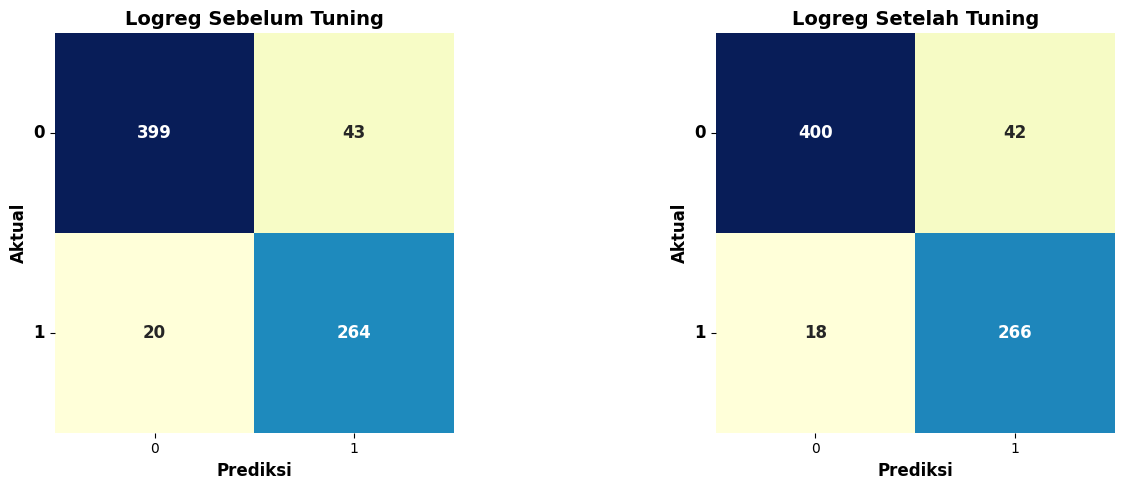

In [59]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='YlGnBu', square=True, 
            annot_kws={"size": 12, "weight": "bold"}, cbar=False)
plt.xlabel('Prediksi', fontsize=12, fontweight='bold')
plt.ylabel('Aktual', fontsize=12, fontweight='bold')
plt.title('Logreg Sebelum Tuning', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_test_tune), annot=True, fmt='d', cmap='YlGnBu', square=True, 
            annot_kws={"size": 12, "weight": "bold"}, cbar=False)
plt.xlabel('Prediksi', fontsize=12, fontweight='bold')
plt.ylabel('Aktual', fontsize=12, fontweight='bold')
plt.title('Logreg Setelah Tuning', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)

plt.tight_layout()
plt.show()

<div style='text-align: left'>
Melakukan pelatihan ulang model <b>Logistic Regression</b> menggunakan seluruh dataset (X dan y) untuk memaksimalkan pembelajaran dari semua data yang tersedia. Setelah model terlatih, model tersebut disimpan.
</div>

In [60]:
# Melatih model LogReg pada seluruh dataset (X dan y)
logreg.fit(X, y)

# Menyimpan model Logreg yang telah dilatih ke dalam file dengan format .sav
file_name = 'students_performance_logreg.sav'
pickle.dump(logreg, open(file_name, 'wb'))

<div style='text-align: left'>
Di sini, ambil <b>koefisien</b> dari model Logistic Regression yang sudah di-tuning, terus kita pasangkan dengan <b>nama-nama fitur</b> hasil preprocessing. Setelah itu, kita pilih <b>10 fitur teratas</b> berdasarkan nilai absolutnya.
</div>

In [61]:
coefs = logreg_tuning.best_estimator_.named_steps['model'].coef_[0]
features = logreg_tuning.best_estimator_.named_steps['preprocessing'].get_feature_names_out()
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'Importance (abs)': np.abs(coefs)
}).sort_values(by='Importance (abs)', ascending=False)

feature_importance.head()

Feature  Coefficient  Importance (abs)
74  robust__Curricular_units_2nd_sem_approved    -3.732561          3.732561
41        onehot__Tuition_fees_up_to_date_Yes    -2.968663          2.968663
69  robust__Curricular_units_1st_sem_approved    -1.939434          1.939434
72  robust__Curricular_units_2nd_sem_enrolled     1.509291          1.509291
45             onehot__Course_Basic Education     1.497221          1.497221

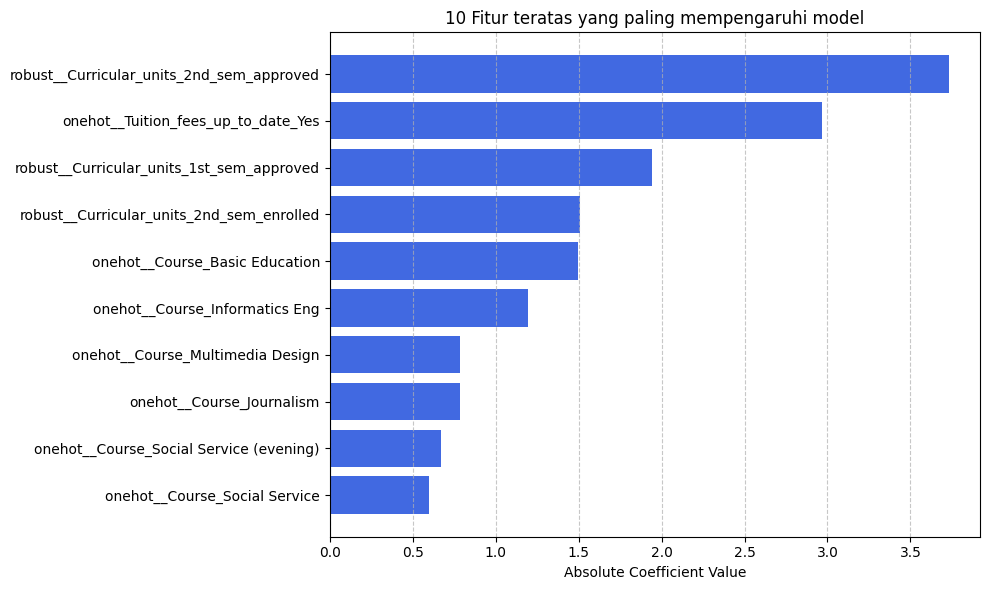

In [62]:
# Mengambil 10 fitur teratas
top_n = 10
top_features = feature_importance.head(top_n)

# Plot horizontal barchart
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance (abs)'], color='royalblue')
plt.xlabel('Absolute Coefficient Value')
plt.title(f'{top_n} Fitur teratas yang paling mempengaruhi model')
plt.gca().invert_yaxis()  # agar yang paling penting di atas
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div style='text-align: left'>
Dari chart di atas terlihat kalau fitur yang paling berpengaruh dalam memprediksi mahasiswa <b>dropout</b> adalah jumlah mata kuliah yang <b>disetujui di semester ke-2</b> (Curricular_units_2nd_sem_approved). Artinya, semakin sedikit mata kuliah yang diselesaikan (nilai disetujui kecil), peluang untuk drop out makin besar. Selain itu, status <b>“Tuition_fees_up_to_date” = Yes</b> juga muncul tinggi, menunjukkan mahasiswa yang <i>tunggakan</i> biaya kuliahnya kemungkinan lebih rendah drop out. Fitur lain seperti jumlah mata kuliah yang disetujui di semester 1 dan pilihan <b>Course</b> tertentu (misalnya Basic Education, Informatics Eng, Multimedia Design, Journalism, Social Service) juga cukup penting—mereka memberi sinyal kalau jurusan dan performa semester pertama ikut memengaruhi keputusan untuk putus kuliah.
</div>

In [63]:
X_train_transformed = logreg.named_steps['preprocessing'].fit_transform(X_train)
transformed_features = logreg.named_steps['preprocessing'].get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_features)
X_train_resampled, y_train_resampled = logreg.named_steps['resample'].fit_resample(X_train_transformed_df, y_train)

In [64]:
X_test_transformed = logreg.named_steps['preprocessing'].transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_features)

In [65]:
logreg.named_steps['model'].fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1, l1_ratio=0.5, max_iter=200, penalty='elasticnet',
                   random_state=42, solver='saga')

<div style='text-align: left'>
Pada bagian ini, menggunakan library <b>SHAP</b> untuk melihat kontribusi masing‐masing fitur secara global. Menampilkan plot ringkasan yang memperlihatkan fitur‐fitur mana saja yang paling berpengaruh terhadap prediksi model—semakin panjang bar pada sisi kanan artinya fitur tersebut mendorong probabilitas dropout lebih tinggi, dan semakin panjang bar pada sisi kiri artinya fitur tersebut menurunkan probabilitas dropout.
</div>

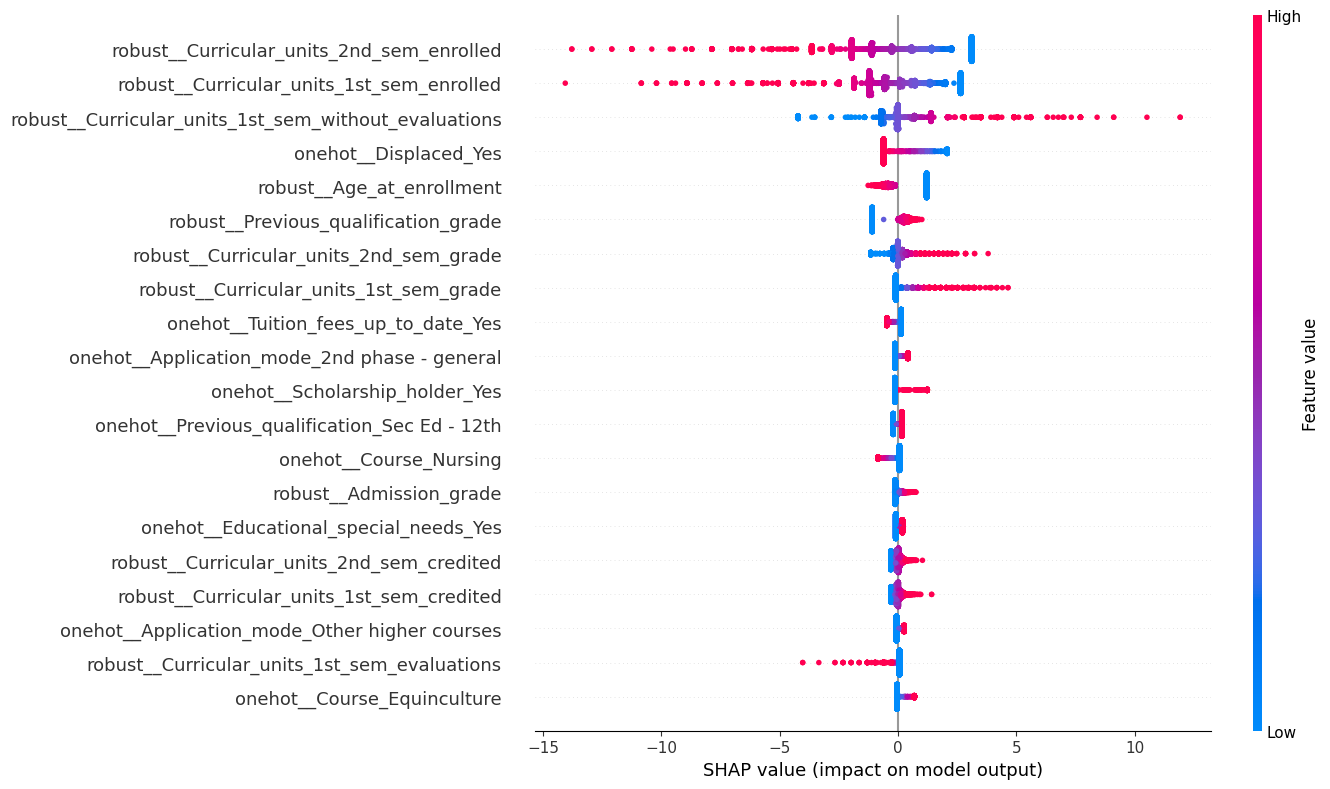

In [66]:
explainer = shap.Explainer(logreg_tuning.best_estimator_.named_steps['model'], X_train_resampled)
shap_values = explainer(X_train_resampled)

# SHAP summary plot
shap.summary_plot(
    shap_values, 
    X_train_resampled, 
    feature_names=features,
    plot_size=(14, 8)
)

<div style='text-align: left'>
Dari plot SHAP ringkasan di atas,  melihat fitur‐fitur yang paling banyak memengaruhi prediksi model untuk mahasiswa dropout.

1. <b>Curricular_units_2nd_sem_enrolled</b> dan <b>Curricular_units_1st_sem_enrolled</b> (jumlah mata kuliah yang diambil) memegang peranan besar. Titik bernilai tinggi (merah) di sisi kiri artinya mahasiswa yang mengambil lebih banyak mata kuliah cenderung <i>kurang mungkin</i> drop out, sedangkan titik biru di kiri menunjukkan yang mengambil sedikit mata kuliah justru menaikkan risiko drop out.

2. Fitur <b>Curricular_units_1st_sem_without_evaluations</b> (jumlah mata kuliah tanpa nilai) juga penting—nilai tinggi (merah) di sisi kiri menunjukkan mahasiswa yang banyak mata kuliah tanpa evaluasi lebih kecil kemungkinan drop out, tetapi nilai rendah (biru) di sisi kanan menunjukkan mahasiswa yang memiliki sedikit mata kuliah tanpa evaluasi lebih besar risiko drop out.

3. Status <b>Displaced</b> (“Yes” atau “No”) muncul sebagai salah satu faktor: titik merah di sisi kiri menandakan mahasiswa yang berstatus displaced lebih kecil kemungkinannya drop out, sementara titik biru yang muncul di kanan mengindikasikan mahasiswa non‐displaced memiliki risiko lebih tinggi.

4. <b>Age_at_enrollment</b> (usia saat masuk) bekerja terbalik—usia yang lebih tinggi (merah) pada sisi kiri cenderung mengurangi risiko drop out, sedangkan usia lebih muda (biru) di sisi kanan meningkatkan risiko.

5. Fitur lain seperti <b>Previous_qualification_grade</b> dan <b>Curricular_units_2nd_sem_grade</b> juga memiliki dampak: nilai tinggi (merah) biasanya membawa pengaruh positif (menurunkan risiko drop out), sedangkan nilai rendah (biru) meningkatkan risiko.

Secara sederhana, mahasiswa yang mengambil lebih banyak mata kuliah, sedikit mata kuliah yang belum dievaluasi, sudah menyelesaikan bayaran (tuition fees up to date), dan memiliki nilai pendidikan sebelumnya lebih tinggi, umumnya lebih kecil kemungkinannya drop out. Sebaliknya, yang memegang sedikit mata kuliah, banyak mata kuliah tanpa nilai, usia lebih muda, atau nilai sebelumnya rendah, cenderung memiliki risiko drop out yang lebih tinggi.
</div>

### `Kesimpulan`

<div style='text-align: left'>

Berikut beberapa poin penting yang dapat ditarik:

1. **Distribusi Dropout yang Signifikan**  
   - Sekitar 30 % mahasiswa drop out, sementara 49 % berhasil lulus. Ini menunjukkan ada kelompok mahasiswa yang butuh perhatian ekstra agar tidak berhenti kuliah di tengah jalan.

2. **Faktor Akademik Semester Dua Sangat Krusial**  
   - Jumlah mata kuliah yang disetujui dan diambil di semester ke-2 merupakan prediktor utama untuk risiko drop out. Mahasiswa yang hanya menyelesaikan sedikit mata kuliah di semester dua cenderung lebih berisiko drop out.

3. **Performa Semester Pertama Juga Penting**  
   - Nilai dan jumlah mata kuliah di semester pertama (misalnya berapa banyak mata kuliah tanpa nilai evaluasi) juga memengaruhi peluang kelanjutan studi. Mereka yang nilai semester pertama rendah lebih rentan drop out.

4. **Status Pembayaran dan Beasiswa Berperan**  
   - Mahasiswa dengan tagihan (tuition) yang sudah dibayar tepat waktu cenderung lebih rendah risiko drop out.  
   - Demikian pula, penerima beasiswa (scholarship_holder) memiliki pola nilai semester kedua yang lebih stabil, yang artinya beasiswa bisa sedikit menurunkan risiko putus kuliah.

5. **Jurusan dan Cara Masuk Juga Memberi Sinyal**  
   - Jurusan tertentu (misalnya Basic Education, Informatics Eng, Multimedia Design, Journalism, Social Service) muncul di antara fitur‐fitur penting, artinya kesuksesan di jurusan tersebut punya kaitan dengan risiko drop out.  
   - Cara masuk (application_mode) juga sedikit berpengaruh—misalnya jalur `2nd phase – general` vs jalur lain dapat memberi gambaran profil mahasiswa yang berbeda.

6. **Usia Saat Masuk Berpengaruh: Mahasiswa Lebih Muda Lebih Berisiko**  
   - Mahasiswa yang mendaftar di usia lebih muda cenderung punya nilai SHAP yang mengarah ke risiko drop out, sementara usia yang lebih tua (misalnya > 30 tahun) sedikit menurunkan risiko.

7. **Model Logistic Regression Terbaik dengan SMOTE**  
   - Dari tiga model (Logistic Regression, Random Forest, XGBoost), Logistic Regression bersama resampling SMOTE berhasil mencetak nilai F2 terbanyak. Ini menunjukkan bahwa untuk data yang cukup seimbang setelah SMOTE, LR memiliki generalisasi yang baik.

8. **Feature Engineering & Preprocessing Terbukti Penting**  
   - Meng-encoding fitur kategorikal (OneHot untuk `Course`, `Tuition_fees_up_to_date`, dll.) dan men‐scale fitur numerik/ordinal (RobustScaler) membantu model menangani outlier dan varians antar fitur dengan lebih stabil.

9. **SHAP Memperlihatkan Arah Pengaruh Masing‐Masing Fitur**  
   - Dengan SHAP summary plot, kita melihat bahwa nilai tinggi pada `Curricular_units_2nd_sem_enrolled` / `1st_sem_enrolled` dan `Admission_grade` cenderung menurunkan risiko drop out, sedangkan nilai rendah di fitur‐fitur tersebut mendorong risiko naik.

10. **Rekomendasi Praktis**  
    - Perkuat dukungan akademik di semester kedua (misalnya tutor atau workshop tambahan) untuk mahasiswa dengan jumlah mata kuliah sedikit.  
    - Perhatikan mahasiswa muda (di bawah 25 tahun) karena mereka punya risiko drop out lebih tinggi.  
    - Pastikan proses pembayaran kuliah (tuition fees) berjalan lancar atau tawarkan bantuan finansial agar tidak muncul beban tunggakan yang memicu putus studi.  
    - Pantau terus performa semester pertama—mahasiswa dengan nilai rendah segera diberikan intervensi (pendampingan belajar, bimbingan karier, dsb.).

Secara keseluruhan, kombinasi analisis deskriptif, visualisasi multivariate, teknik resampling, dan pemodelan (Logistic Regression dengan tuning) menghasilkan gambaran yang komprehensif tentang faktor‐faktor yang memengaruhi risiko drop out, serta menyediakan dasar rekomendasi agar universitas dapat menurunkan tingkat drop out dan meningkatkan tingkat kelulusan.

</div>

### `Rekomendasi Aksi`

<div style='text-align: left'>

1. **Implementasikan Sistem Peringatan Dini (Early Warning System)**  
   - Pasang dashboard monitoring performa akademik yang terintegrasi (misalnya, nilai mata kuliah, jumlah mata kuliah tanpa evaluasi).  
   - Kirim notifikasi otomatis kepada dosen dan penasihat akademik ketika seorang mahasiswa memiliki risiko tinggi (contoh: nilai semester pertama di bawah batas tertentu atau sedikit mata kuliah disetujui).  
   - Tindak lanjuti notifikasi tersebut dengan jadwal bimbingan khusus dalam 1–2 minggu ke depan.

2. **Perkuat Bimbingan Akademik di Semester Pertama dan Kedua**  
   - Sediakan sesi workshop atau remidi (bimbingan belajar) untuk topik-topik inti dan mata kuliah wajib, terutama bagi mahasiswa baru yang menunjukkan kesulitan.  
   - Bentuk kelompok belajar (study group) di antara mahasiswa dengan nilai rendah di semester pertama, dipandu oleh tutor atau asisten dosen.  
   - Jadwalkan minimal satu pertemuan bimbingan tatap muka setiap bulan dengan dosen wali atau mentor bagi mahasiswa yang sedang menurunkan jumlah mata kuliah di semester dua.

3. **Perluas Program Bantuan Keuangan dan Konseling Finansial**  
   - Buat paket bantuan biaya kuliah darurat (bridge financing) untuk mahasiswa yang tertunda pembayaran (tuition fees up to date = No). Pastikan proses pengajuan ringkas, tanpa birokrasi berlebih.  
   - Tawarkan beasiswa mikro (partial scholarship) bagi mahasiswa yang sebelumnya belum menerima beasiswa namun menunjukkan prestasi akademik potensi tinggi di semester awal.  
   - Selenggarakan sesi konseling keuangan (financial counseling) setiap semester untuk menjelaskan opsi cicilan, beasiswa, atau dana sosial kepada mahasiswa yang berisiko menunggak.

4. **Kembangkan Program Mentoring Sebaya dan Alumni**  
   - Pasangkan setiap mahasiswa baru dengan mahasiswa senior (peer mentor) yang memiliki rekam jejak prestasi baik—fokus pada jurusan yang sama (misalnya Informatics Eng, Basic Education, Social Service).  
   - Undang alumnus yang berhasil meraih kesuksesan di bidangnya untuk berbagi pengalaman pada seminar motivasi, sehingga mahasiswa terinspirasi dan punya gambaran tujuan karier jangka panjang.  
   - Jadwalkan pertemuan rutin (misalnya sekali sebulan) pada kelompok mentoring untuk membahas tekanan akademik, adaptasi sosial, dan manajemen waktu.

5. **Optimalkan Pelayanan Layanan Konseling Psikologi dan Kehidupan Mahasiswa**  
   - Tambahkan kuota konselor profesional untuk menampung mahasiswa yang mengalami stres atau masalah pribadi (misalnya tekanan keluarga, kesehatan mental).  
   - Susun modul `Life Skills Workshop` yang mencakup manajemen stres, keterampilan manajemen waktu, dan strategi belajar efektif—wajib untuk mahasiswa dengan risiko awal (nilai semester perdana rendah).  
   - Pastikan layanan konseling mudah diakses (online booking) dan komunikasikan secara rutin melalui email, media kampus, dan kelompok WhatsApp.

6. **Tingkatkan Dukungan Mata Kuliah Kritis dengan Engagement Dosen**  
   - Identifikasi mata kuliah yang paling banyak memunculkan mahasiswa tanpa evaluasi (zero-evaluations) di semester pertama, lalu minta tim dosen untuk menyediakan sesi `office hour` tambahan khusus topik sulit.  
   - Terapkan kebijakan `progress check` (cek perkembangan) pada mata kuliah wajib:  
     - Mahasiswa yang melewatkan lebih dari 20 % tugas/kuis harus mendapat panggilan bimbingan dua minggu sebelum ujian.  
   - Adakan `mid‐semester survey` untuk menanyakan kendala akademik dan non-akademik setiap mata kuliah—hasilnya ditindaklanjuti oleh departemen terkait.

7. **Gunakan Analisis Data secara Berkelanjutan**  
   - Jalankan monitoring bulanan untuk memeriksa tren jumlah mata kuliah disetujui, nilai rata‐rata admission_grade, dan jumlah mahasiswa yang mengambil semester kedua di bawah rata‐rata.  
   - Evaluasi ulang model prediksi setiap semester:  
     - Tinjau apakah fitur‐fitur penting (misalnya Curricular_units_2nd_sem_approved) berubah bobotnya, dan sesuaikan intervensi bila perlu.  
   - Lakukan rapat lintas departemen (akademik, keuangan, layanan mahasiswa) setiap akhir semester untuk membahas laporan model dan rekomendasi intervensi.

8. **Sosialisasikan Kebijakan `Retention Incentive`**  
   - Beri penghargaan (voucher buku, sertifikat prestasi, kredit ekstra) bagi mahasiswa yang berhasil mempertahankan persentase mata kuliah disetujui minimal 80 % dalam dua semester pertama.  
   - Buka program `Early Graduation Track` untuk mahasiswa berprestasi, sehingga mereka memiliki motivasi tambahan untuk menyelesaikan studi tepat waktu.

9. **Fokus pada Mahasiswa Kelompok Usia Muda (< 25 Tahun)**  
   - Karena data menunjukkan mahasiswa lebih muda cenderung drop out, buat kelompok orientasi ekstra untuk membantu mereka beradaptasi dengan lingkungan kampus.  
   - Jalankan `First‐Year Experience` workshop yang mengajarkan manajemen waktu, strategi belajar, dan cara memanfaatkan sumber daya kampus (perpustakaan, lab, pusat karier).

10. **Review dan Refine Secara Berkala**  
    - Lakukan evaluasi kuartalan terhadap efektivitas intervensi (misal, perubahan angka dropout setelah pengenalan bimbingan intensif semester pertama).  
    - Kumpulkan umpan balik langsung dari mahasiswa yang hampir drop out (survei atau wawancara) untuk memahami kendala spesifik, misalnya masalah transportasi, akses internet, atau dukungan keluarga.  
    - Gunakan hasil umpan balik tersebut untuk mengoptimalkan kebijakan dan program pendukung pada semester berikutnya.

Dengan menjalankan action items di atas secara konsisten dan terukur, institusi akan memiliki strategi konkret untuk menekan angka dropout, membantu mahasiswa tetap bertahan, dan meningkatkan angka kelulusan secara keseluruhan.
</div>